# Machine Learning Practical: Coursework 1

**Release date: Monday 10th October 2016**  
**Due date: 16:00 Thursday 27th October 2016**

Instructions for the coursework are [available as a PDF here](http://www.inf.ed.ac.uk/teaching/courses/mlp/2016/coursework_1.pdf).

## Part 1: Learning rate schedules

In [1]:
#import different package
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.schedulers import ExponentialLearningRateScheduler, ConstantLearningRateScheduler, ReciprocalLearningRateScheduler
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#define a function that can show the plot
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule, title,param):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedule)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.grid('on')
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Proportion')
    ax_1.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' error')
    fig_1.tight_layout()
    fig_1.savefig(title+param+'train.svg')
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.grid('on')
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Proportion')
    ax_2.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' acc')
    fig_2.tight_layout()
    fig_2.savefig(title+param+'test.svg')
    
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
#------------------load data--------------------#
input_dim, output_dim, hidden_dim = 784, 10, 100
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.27s to complete
  error(train)=3.46e-01, acc(train)=9.03e-01, error(valid)=3.21e-01, acc(valid)=9.10e-01, params_penalty=0.00e+00
Epoch 10: 1.39s to complete
  error(train)=2.78e-01, acc(train)=9.19e-01, error(valid)=2.60e-01, acc(valid)=9.25e-01, params_penalty=0.00e+00
Epoch 15: 1.24s to complete
  error(train)=2.44e-01, acc(train)=9.29e-01, error(valid)=2.31e-01, acc(valid)=9.32e-01, params_penalty=0.00e+00
Epoch 20: 1.24s to complete
  error(train)=2.21e-01, acc(train)=9.35e-01, error(valid)=2.11e-01, acc(valid)=9.39e-01, params_penalty=0.00e+00
Epoch 25: 1.26s to complete
  error(train)=2.06e-01, acc(train)=9.40e-01, error(valid)=1.98e-01, acc(valid)=9.44e-01, params_penalty=0.00e+00
Epoch 30: 1.24s to complete
  error(train)=1.96e-01, acc(train)=9.43e-01, error(valid)=1.89e-01, acc(valid)=9.48e-01, params_penalty=0.00e+00
Epoch 35: 1.26s to complete
  error(train)=1.89e-01, acc(train)=9.46e-01, error(valid)=1.83e-01, acc(valid)=9.50e-01, params_penalty=0.00e+00
Epoch 4

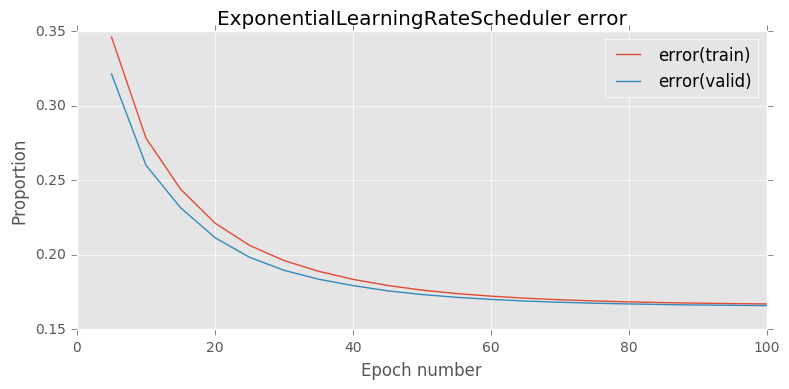

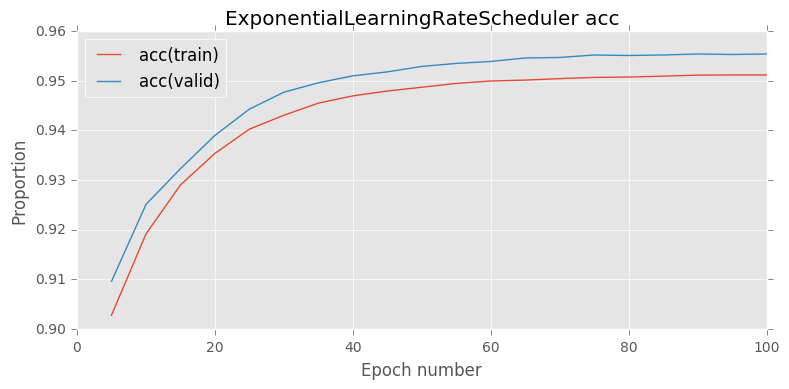

    final error(train) = 1.67e-01
    final error(valid) = 1.66e-01
    final acc(train)   = 9.51e-01
    final acc(valid)   = 9.55e-01
    run time per epoch = 1.53s
--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=3.42e-01, acc(train)=9.03e-01, error(valid)=3.17e-01, acc(valid)=9.11e-01, params_penalty=0.00e+00
Epoch 10: 1.21s to complete
  error(train)=2.64e-01, acc(train)=9.24e-01, error(valid)=2.48e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00
Epoch 15: 1.21s to complete
  error(train)=2.20e-01, acc(train)=9.37e-01, error(valid)=2.08e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00
Epoch 20: 1.21s to complete
  error(train)=1.92e-01, acc(train)=9.45e-01, error(valid)=1.86e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00
Epoch 25: 1.22s to complete
  error(train)=1.67e-01, acc(train)=9.52e-01, error(valid)=1.65e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00
Epoch 30: 1.21s to complete
  error(train)=1.50e-01, acc(train)=9.56e-01, error(valid)=1.53e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00
Epoch 35: 1.21s to complete
  error(train)=1.38e-01, acc(train)=9.60e-01, error(valid)=1.45e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 4

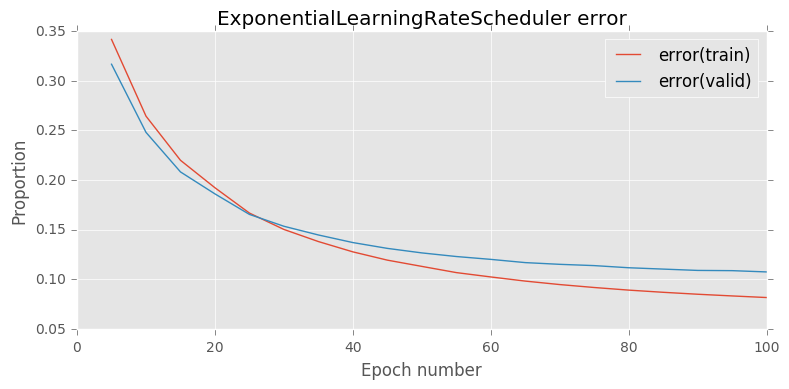

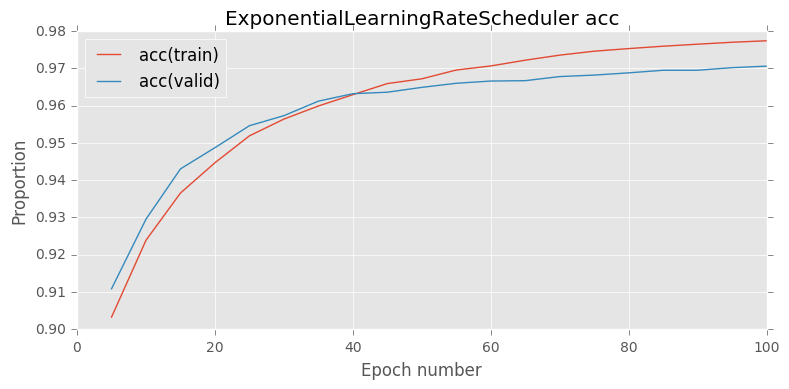

    final error(train) = 8.16e-02
    final error(valid) = 1.07e-01
    final acc(train)   = 9.77e-01
    final acc(valid)   = 9.71e-01
    run time per epoch = 1.43s
--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=3.39e-01, acc(train)=9.04e-01, error(valid)=3.15e-01, acc(valid)=9.10e-01, params_penalty=0.00e+00
Epoch 10: 1.21s to complete
  error(train)=2.59e-01, acc(train)=9.26e-01, error(valid)=2.44e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00
Epoch 15: 1.21s to complete
  error(train)=2.13e-01, acc(train)=9.38e-01, error(valid)=2.04e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00
Epoch 20: 1.21s to complete
  error(train)=1.78e-01, acc(train)=9.48e-01, error(valid)=1.75e-01, acc(valid)=9.51e-01, params_penalty=0.00e+00
Epoch 25: 1.45s to complete
  error(train)=1.53e-01, acc(train)=9.56e-01, error(valid)=1.55e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00
Epoch 30: 1.43s to complete
  error(train)=1.35e-01, acc(train)=9.61e-01, error(valid)=1.40e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 35: 1.26s to complete
  error(train)=1.21e-01, acc(train)=9.66e-01, error(valid)=1.30e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 4

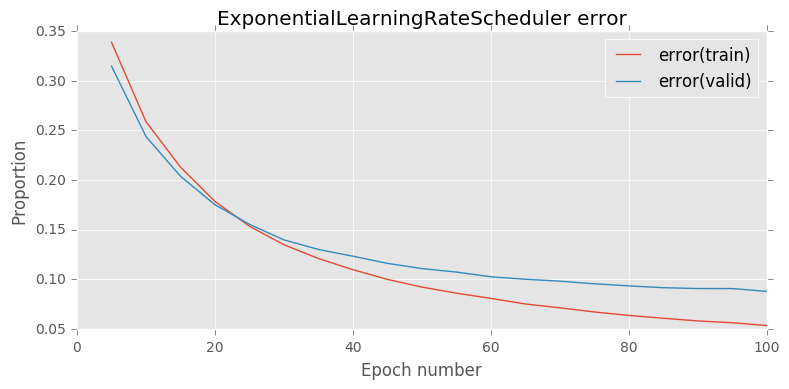

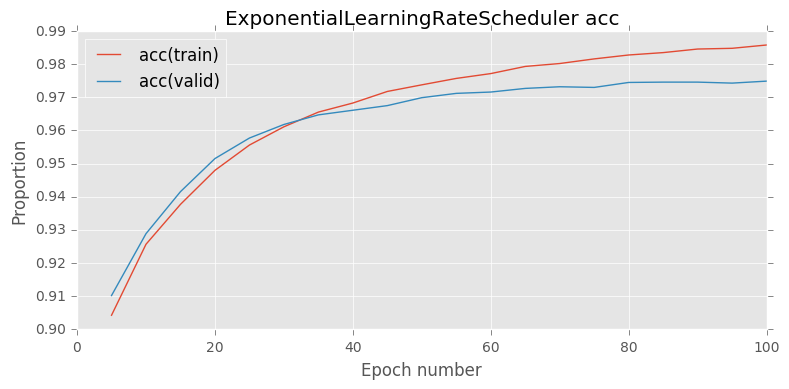

    final error(train) = 5.35e-02
    final error(valid) = 8.79e-02
    final acc(train)   = 9.86e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.49s
Learning_rate0.05
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 1.67e-01           | 1.66e-01           |  0.95            | 0.96             |
| 50.0        | 8.16e-02           | 1.07e-01           |  0.98            | 0.97             |
| 100.0        | 5.35e-02           | 8.79e-02           |  0.99            | 0.97             |
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=2.71e-01, acc(train)=9.21e-01, error(valid)=2.56e-01, acc(valid)=9.26e-01, params_penalty=0.00e+00
Epoch 10: 1.21s to complete
  error(train)=2.01e-01, acc(train)=9.41e-01, error(valid)=1.96e-01, acc(valid)=9.45e-01, params_penalty=0.00e+00
Epoch 15: 1.21s to complete
  error(train)=1.64e-01, acc(train)=9.52e-01, error(valid)=1.65e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00
Epoch 20: 1.21s to complete
  error(train)=1.41e-01, acc(train)=9.60e-01, error(valid)=1.47e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00
Epoch 25: 1.21s to complete
  error(train)=1.26e-01, acc(train)=9.63e-01, error(valid)=1.36e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 30: 1.20s to complete
  error(train)=1.16e-01, acc(train)=9.66e-01, error(valid)=1.28e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00
Epoch 35: 1.21s to complete
  error(train)=1.10e-01, acc(train)=9.68e-01, error(valid)=1.23e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 4

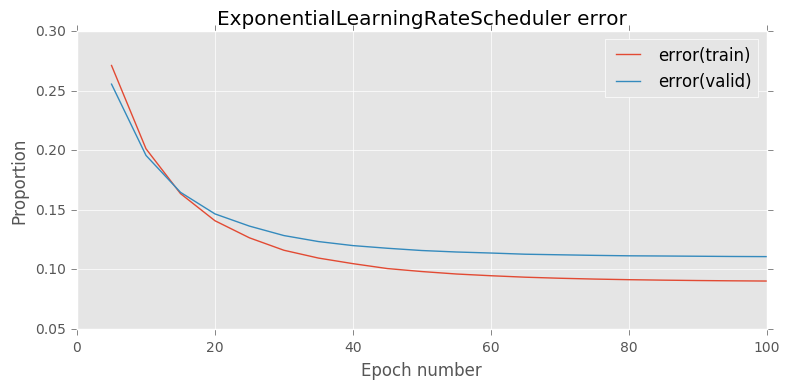

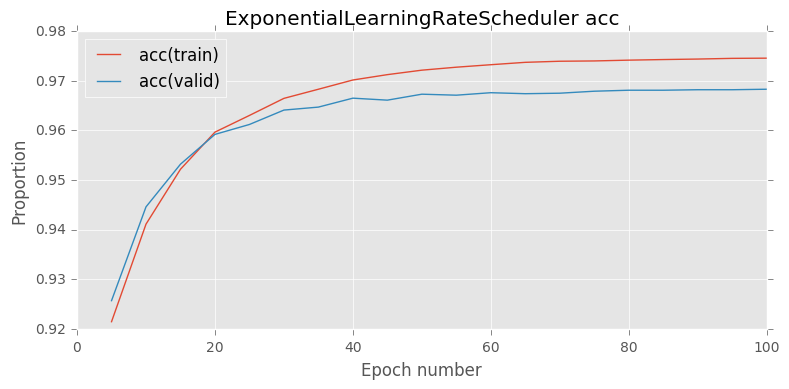

    final error(train) = 9.02e-02
    final error(valid) = 1.11e-01
    final acc(train)   = 9.75e-01
    final acc(valid)   = 9.68e-01
    run time per epoch = 1.41s
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.19s to complete
  error(train)=2.61e-01, acc(train)=9.24e-01, error(valid)=2.45e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=1.85e-01, acc(train)=9.46e-01, error(valid)=1.82e-01, acc(valid)=9.50e-01, params_penalty=0.00e+00
Epoch 15: 1.19s to complete
  error(train)=1.40e-01, acc(train)=9.60e-01, error(valid)=1.47e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00
Epoch 20: 1.18s to complete
  error(train)=1.13e-01, acc(train)=9.68e-01, error(valid)=1.28e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00
Epoch 25: 1.19s to complete
  error(train)=9.43e-02, acc(train)=9.74e-01, error(valid)=1.15e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00
Epoch 30: 1.19s to complete
  error(train)=8.26e-02, acc(train)=9.77e-01, error(valid)=1.08e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 35: 1.18s to complete
  error(train)=7.17e-02, acc(train)=9.81e-01, error(valid)=1.03e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 4

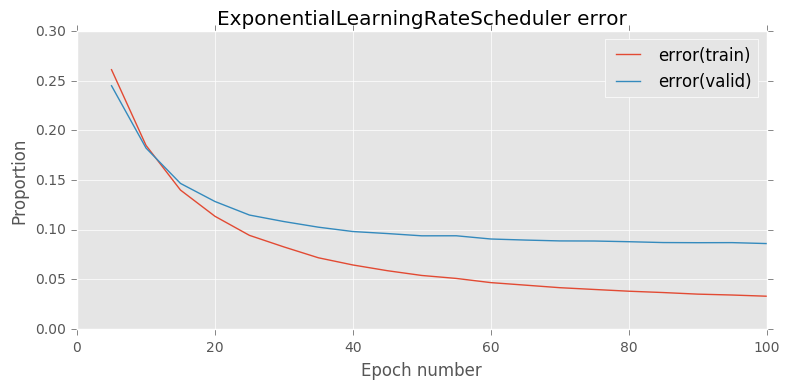

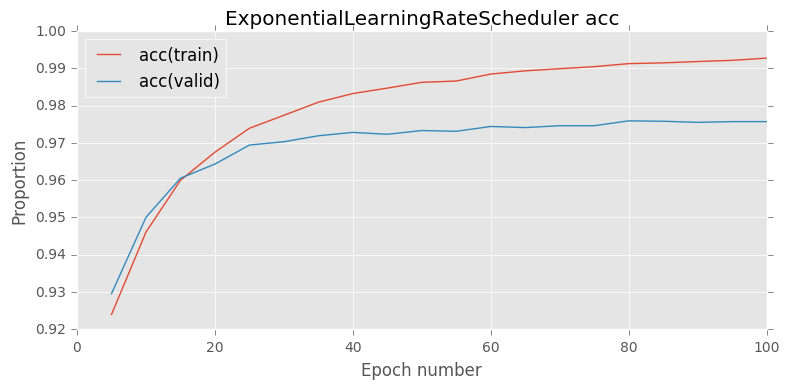

    final error(train) = 3.30e-02
    final error(valid) = 8.60e-02
    final acc(train)   = 9.93e-01
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.41s
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=2.57e-01, acc(train)=9.26e-01, error(valid)=2.43e-01, acc(valid)=9.31e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=1.77e-01, acc(train)=9.49e-01, error(valid)=1.73e-01, acc(valid)=9.52e-01, params_penalty=0.00e+00
Epoch 15: 1.19s to complete
  error(train)=1.35e-01, acc(train)=9.61e-01, error(valid)=1.42e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00
Epoch 20: 1.19s to complete
  error(train)=1.05e-01, acc(train)=9.70e-01, error(valid)=1.22e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00
Epoch 25: 1.22s to complete
  error(train)=8.69e-02, acc(train)=9.75e-01, error(valid)=1.10e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00
Epoch 30: 1.19s to complete
  error(train)=7.30e-02, acc(train)=9.80e-01, error(valid)=1.02e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 35: 1.19s to complete
  error(train)=6.35e-02, acc(train)=9.82e-01, error(valid)=9.71e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00
Epoch 4

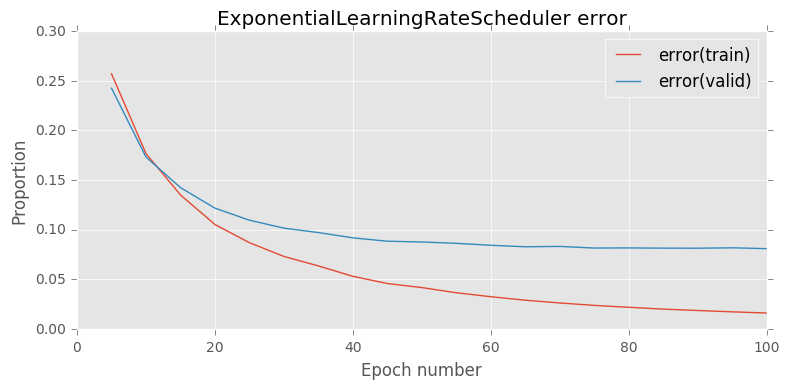

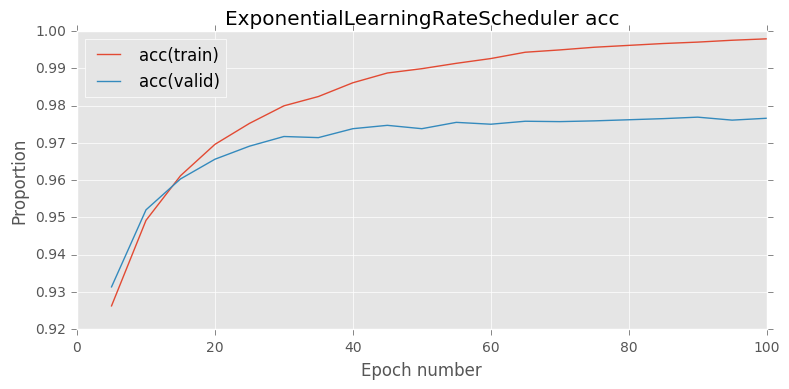

    final error(train) = 1.60e-02
    final error(valid) = 8.09e-02
    final acc(train)   = 9.98e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.37s
Learning_rate0.1
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 1.67e-01           | 1.66e-01           |  0.95            | 0.96             |
| 50.0        | 8.16e-02           | 1.07e-01           |  0.98            | 0.97             |
| 100.0        | 5.35e-02           | 8.79e-02           |  0.99            | 0.97             |
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 2.22s to complete
  error(train)=1.02e-01, acc(train)=9.69e-01, error(valid)=1.20e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 10: 1.21s to complete
  error(train)=4.92e-02, acc(train)=9.86e-01, error(valid)=8.60e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00
Epoch 15: 1.23s to complete
  error(train)=3.17e-02, acc(train)=9.92e-01, error(valid)=8.34e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 20: 1.22s to complete
  error(train)=2.07e-02, acc(train)=9.96e-01, error(valid)=7.87e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00
Epoch 25: 1.22s to complete
  error(train)=1.54e-02, acc(train)=9.98e-01, error(valid)=7.81e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 30: 1.21s to complete
  error(train)=1.29e-02, acc(train)=9.98e-01, error(valid)=7.93e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.20s to complete
  error(train)=1.09e-02, acc(train)=9.99e-01, error(valid)=7.81e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 4

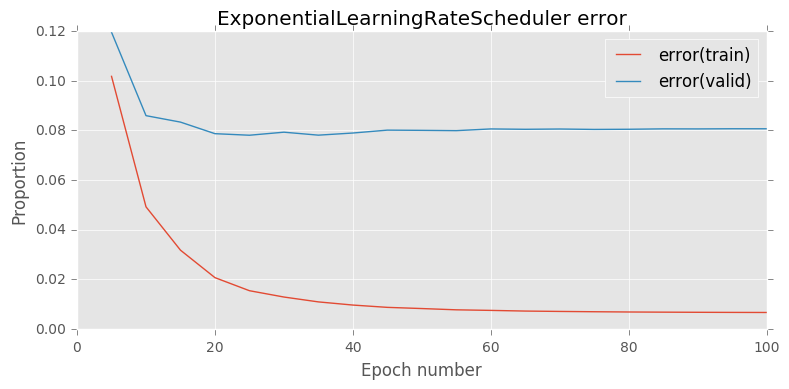

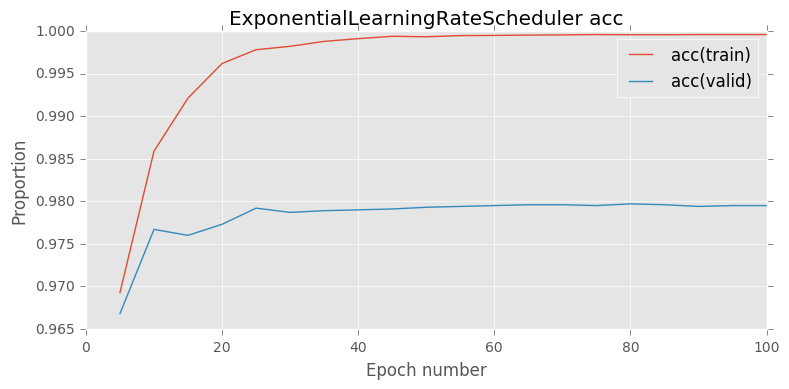

    final error(train) = 6.63e-03
    final error(valid) = 8.07e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.43s
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.18s to complete
  error(train)=9.63e-02, acc(train)=9.71e-01, error(valid)=1.09e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=4.45e-02, acc(train)=9.87e-01, error(valid)=9.17e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 15: 1.20s to complete
  error(train)=2.39e-02, acc(train)=9.94e-01, error(valid)=8.25e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 20: 1.19s to complete
  error(train)=1.38e-02, acc(train)=9.98e-01, error(valid)=8.69e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 25: 1.22s to complete
  error(train)=8.10e-03, acc(train)=9.99e-01, error(valid)=8.51e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 2.36s to complete
  error(train)=4.99e-03, acc(train)=1.00e+00, error(valid)=8.55e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.21s to complete
  error(train)=3.82e-03, acc(train)=1.00e+00, error(valid)=8.72e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 4

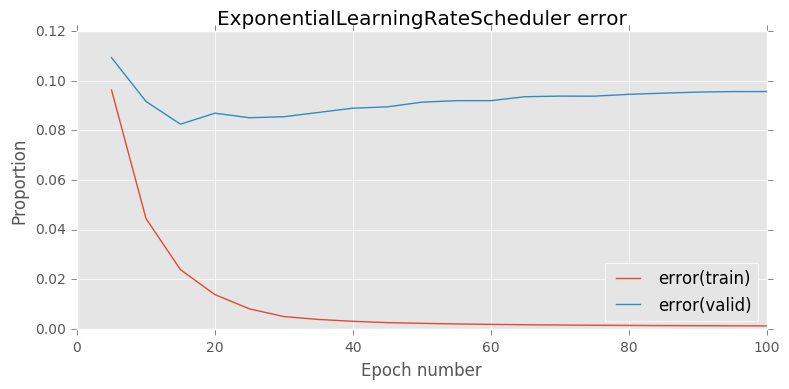

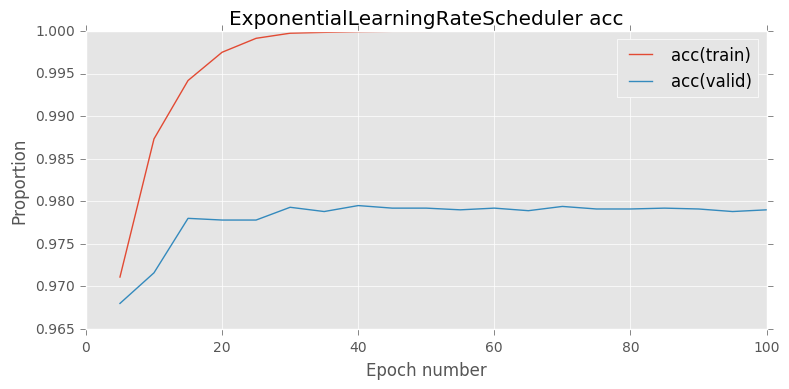

    final error(train) = 1.23e-03
    final error(valid) = 9.57e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.40s
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.19s to complete
  error(train)=1.03e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=5.70e-02, acc(train)=9.82e-01, error(valid)=9.95e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 15: 1.19s to complete
  error(train)=2.28e-02, acc(train)=9.94e-01, error(valid)=8.27e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 20: 1.19s to complete
  error(train)=1.12e-02, acc(train)=9.98e-01, error(valid)=8.20e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 25: 1.20s to complete
  error(train)=6.44e-03, acc(train)=1.00e+00, error(valid)=8.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.19s to complete
  error(train)=3.97e-03, acc(train)=1.00e+00, error(valid)=8.68e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 35: 1.19s to complete
  error(train)=2.94e-03, acc(train)=1.00e+00, error(valid)=8.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4

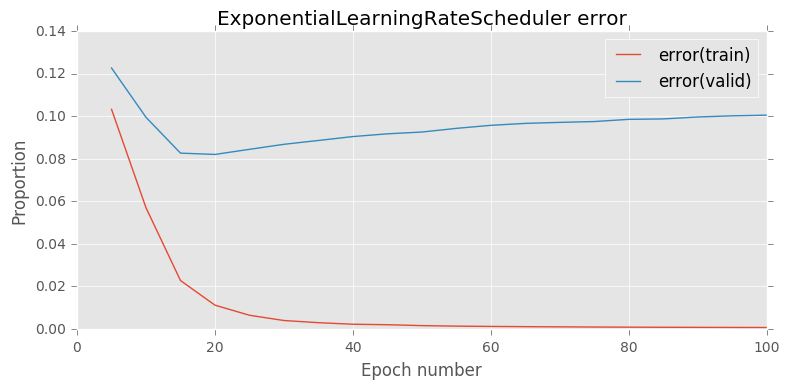

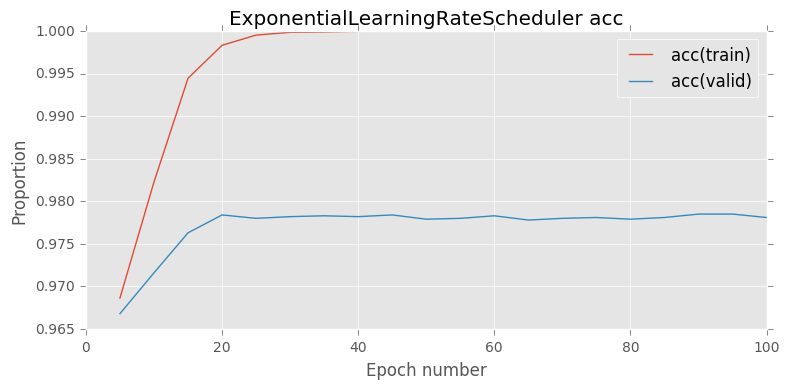

    final error(train) = 6.77e-04
    final error(valid) = 1.01e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.41s
Learning_rate0.5
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 1.67e-01           | 1.66e-01           |  0.95            | 0.96             |
| 50.0        | 8.16e-02           | 1.07e-01           |  0.98            | 0.97             |
| 100.0        | 5.35e-02           | 8.79e-02           |  0.99            | 0.97             |


In [4]:
# Exponential--------------double rate loop

num_epochs=100
stats_interval = 5
learning_rates = [0.05, 0.1, 0.5 ]
learning_rate_decays = [20.0,50.0,100.0]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    for learning_rate_decay in learning_rate_decays:
        print('-' * 80)
        print('learning_rate={0:.2f} learning_rate_decay={1:.2f} num_epochs = {2:.2f}'
              .format(learning_rate, learning_rate_decay, num_epochs))
        print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        train_data.reset()
        valid_data.reset()


        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)

        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
        schedule = [ExponentialLearningRateScheduler(learning_rate=learning_rate,learning_rate_decay=learning_rate_decay)]
        param = str(learning_rate+learning_rate_decay)
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'ExponentialLearningRateScheduler',param)
    
        plt.show()

        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

        final_errors_train.append(stats[-1, keys['error(train)']])
        final_errors_valid.append(stats[-1, keys['error(valid)']])
        final_accs_train.append(stats[-1, keys['acc(train)']])
        final_accs_valid.append(stats[-1, keys['acc(valid)']])
    j = 0
    print('Learning_rate{0}'.format(learning_rate))
    print('| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
    print('|---------------------|--------------------|--------------------|------------------|------------------|')
    for learning_rate_decay in learning_rate_decays:
        print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
              .format(learning_rate_decay, 
                      final_errors_train[j], final_errors_valid[j],
                      final_accs_train[j], final_accs_valid[j]))
        j += 1

--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.38s to complete
  error(train)=3.49e-01, acc(train)=9.01e-01, error(valid)=3.23e-01, acc(valid)=9.06e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=2.74e-01, acc(train)=9.19e-01, error(valid)=2.58e-01, acc(valid)=9.25e-01, params_penalty=0.00e+00
Epoch 15: 1.41s to complete
  error(train)=2.37e-01, acc(train)=9.31e-01, error(valid)=2.25e-01, acc(valid)=9.35e-01, params_penalty=0.00e+00
Epoch 20: 1.21s to complete
  error(train)=2.13e-01, acc(train)=9.37e-01, error(valid)=2.05e-01, acc(valid)=9.40e-01, params_penalty=0.00e+00
Epoch 25: 1.43s to complete
  error(train)=1.93e-01, acc(train)=9.44e-01, error(valid)=1.88e-01, acc(valid)=9.48e-01, params_penalty=0.00e+00
Epoch 30: 1.21s to complete
  error(train)=1.79e-01, acc(train)=9.48e-01, error(valid)=1.78e-01, acc(valid)=9.51e-01, params_penalty=0.00e+00
Epoch 35: 1.33s to complete
  error(train)=1.67e-01, acc(train)=9.51e-01, error(valid)=1.68e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00
Epoch 4

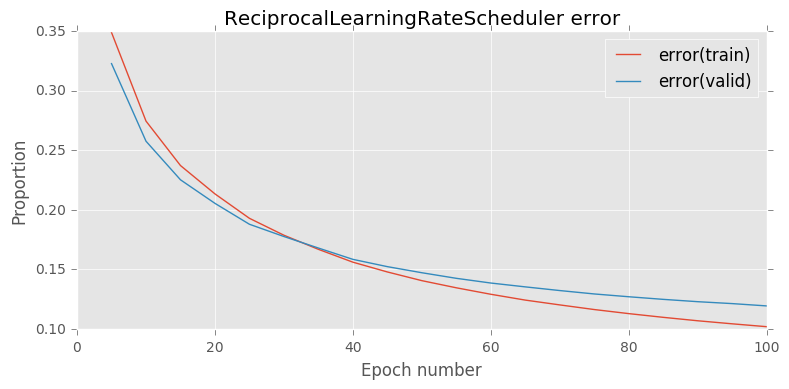

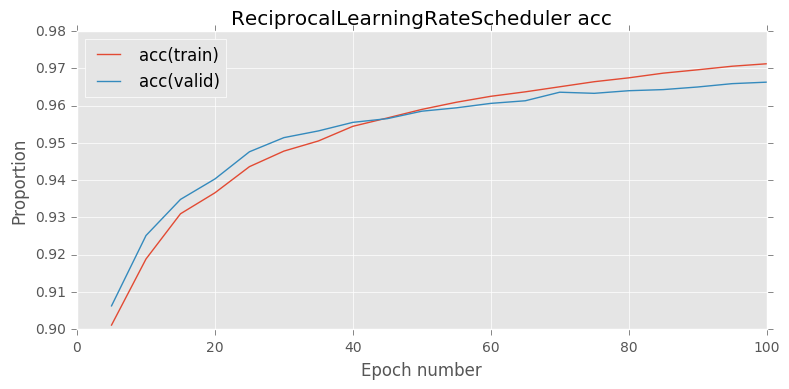

    final error(train) = 1.02e-01
    final error(valid) = 1.19e-01
    final acc(train)   = 9.71e-01
    final acc(valid)   = 9.66e-01
    run time per epoch = 1.50s
--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.19s to complete
  error(train)=3.39e-01, acc(train)=9.05e-01, error(valid)=3.14e-01, acc(valid)=9.12e-01, params_penalty=0.00e+00
Epoch 10: 1.19s to complete
  error(train)=2.63e-01, acc(train)=9.24e-01, error(valid)=2.47e-01, acc(valid)=9.30e-01, params_penalty=0.00e+00
Epoch 15: 1.19s to complete
  error(train)=2.18e-01, acc(train)=9.37e-01, error(valid)=2.09e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00
Epoch 20: 1.19s to complete
  error(train)=1.87e-01, acc(train)=9.45e-01, error(valid)=1.83e-01, acc(valid)=9.50e-01, params_penalty=0.00e+00
Epoch 25: 2.74s to complete
  error(train)=1.65e-01, acc(train)=9.53e-01, error(valid)=1.65e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00
Epoch 30: 1.40s to complete
  error(train)=1.48e-01, acc(train)=9.57e-01, error(valid)=1.52e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00
Epoch 35: 1.19s to complete
  error(train)=1.33e-01, acc(train)=9.62e-01, error(valid)=1.40e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 4

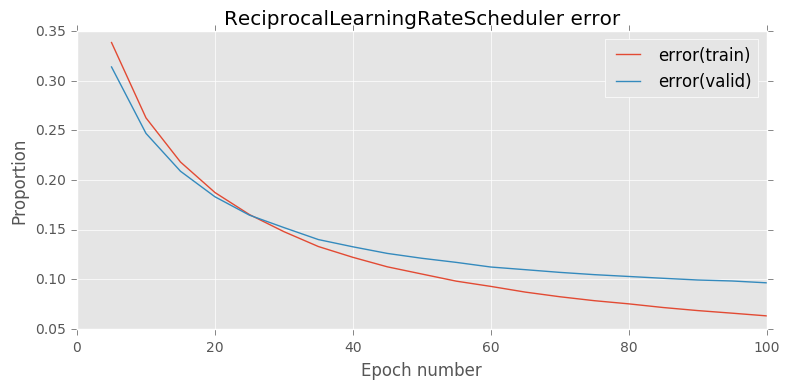

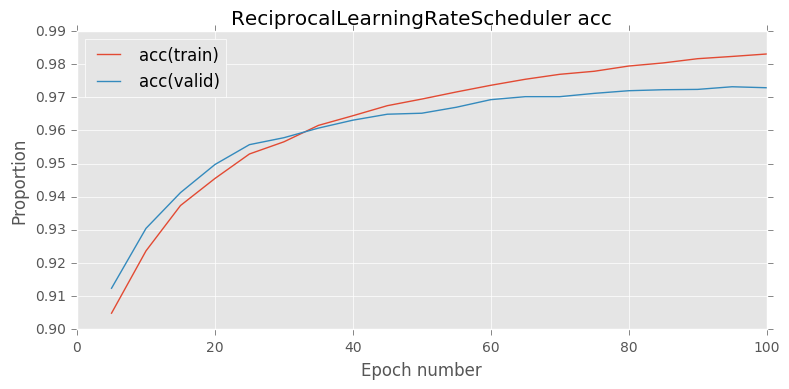

    final error(train) = 6.32e-02
    final error(valid) = 9.65e-02
    final acc(train)   = 9.83e-01
    final acc(valid)   = 9.73e-01
    run time per epoch = 1.52s
--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.60s to complete
  error(train)=3.39e-01, acc(train)=9.04e-01, error(valid)=3.13e-01, acc(valid)=9.11e-01, params_penalty=0.00e+00
Epoch 10: 1.52s to complete
  error(train)=2.60e-01, acc(train)=9.25e-01, error(valid)=2.43e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00
Epoch 15: 1.20s to complete
  error(train)=2.15e-01, acc(train)=9.38e-01, error(valid)=2.05e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00
Epoch 20: 1.19s to complete
  error(train)=1.83e-01, acc(train)=9.48e-01, error(valid)=1.80e-01, acc(valid)=9.50e-01, params_penalty=0.00e+00
Epoch 25: 1.20s to complete
  error(train)=1.56e-01, acc(train)=9.55e-01, error(valid)=1.57e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00
Epoch 30: 1.20s to complete
  error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.42e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 35: 1.19s to complete
  error(train)=1.22e-01, acc(train)=9.65e-01, error(valid)=1.32e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00
Epoch 4

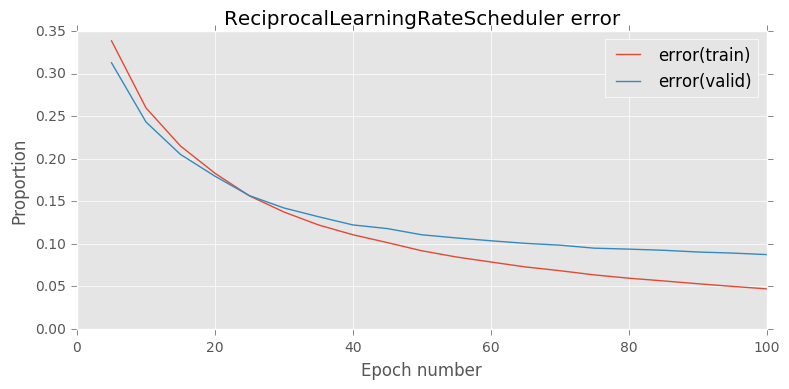

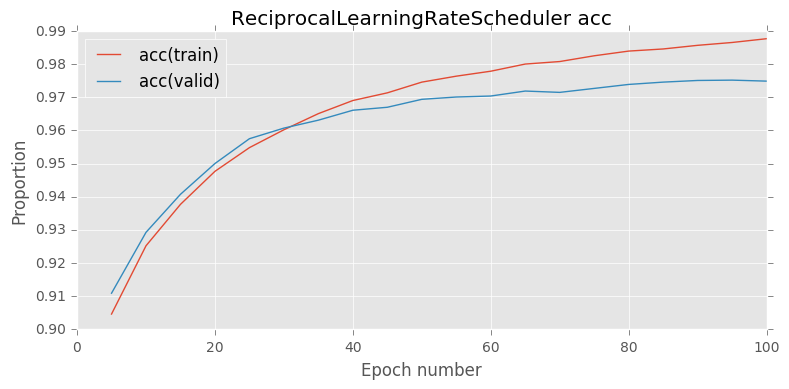

    final error(train) = 4.71e-02
    final error(valid) = 8.74e-02
    final acc(train)   = 9.88e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.45s
Learning_rate0.05
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 1.02e-01           | 1.19e-01           |  0.97            | 0.97             |
| 50.0        | 6.32e-02           | 9.65e-02           |  0.98            | 0.97             |
| 100.0        | 4.71e-02           | 8.74e-02           |  0.99            | 0.97             |
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.19s to complete
  error(train)=2.71e-01, acc(train)=9.22e-01, error(valid)=2.56e-01, acc(valid)=9.26e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=1.94e-01, acc(train)=9.44e-01, error(valid)=1.87e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00
Epoch 15: 1.19s to complete
  error(train)=1.54e-01, acc(train)=9.56e-01, error(valid)=1.54e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00
Epoch 20: 1.20s to complete
  error(train)=1.31e-01, acc(train)=9.62e-01, error(valid)=1.37e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 25: 1.19s to complete
  error(train)=1.14e-01, acc(train)=9.68e-01, error(valid)=1.24e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 30: 1.19s to complete
  error(train)=1.01e-01, acc(train)=9.72e-01, error(valid)=1.16e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00
Epoch 35: 1.20s to complete
  error(train)=9.18e-02, acc(train)=9.74e-01, error(valid)=1.10e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00
Epoch 4

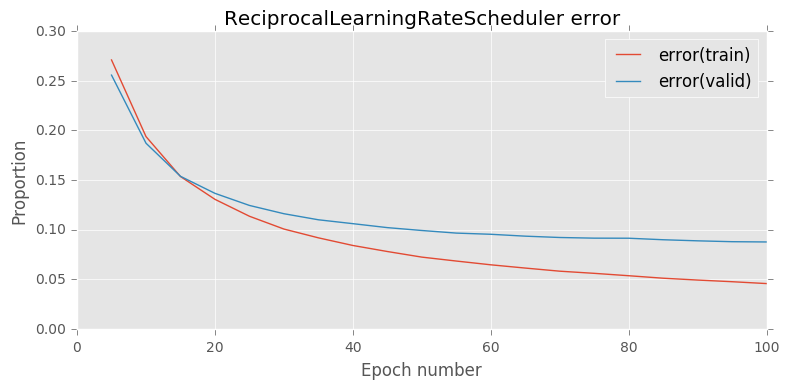

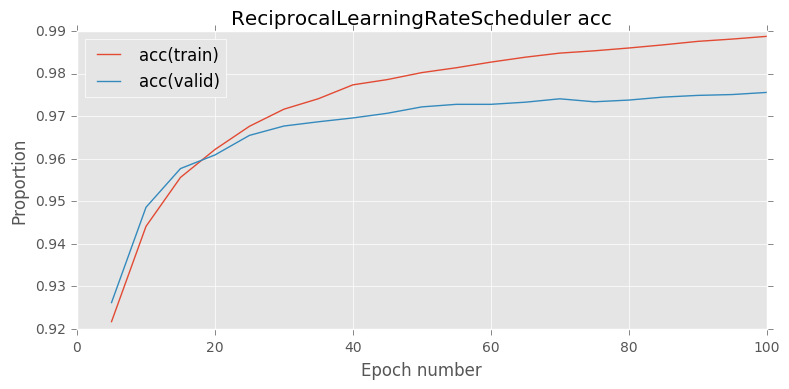

    final error(train) = 4.57e-02
    final error(valid) = 8.76e-02
    final acc(train)   = 9.89e-01
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.40s
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.20s to complete
  error(train)=2.63e-01, acc(train)=9.23e-01, error(valid)=2.48e-01, acc(valid)=9.28e-01, params_penalty=0.00e+00
Epoch 10: 1.19s to complete
  error(train)=1.89e-01, acc(train)=9.45e-01, error(valid)=1.85e-01, acc(valid)=9.48e-01, params_penalty=0.00e+00
Epoch 15: 1.19s to complete
  error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.42e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00
Epoch 20: 1.20s to complete
  error(train)=1.08e-01, acc(train)=9.69e-01, error(valid)=1.22e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 25: 1.19s to complete
  error(train)=8.84e-02, acc(train)=9.75e-01, error(valid)=1.08e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 30: 1.19s to complete
  error(train)=7.66e-02, acc(train)=9.79e-01, error(valid)=1.03e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00
Epoch 35: 1.20s to complete
  error(train)=6.61e-02, acc(train)=9.82e-01, error(valid)=9.37e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 4

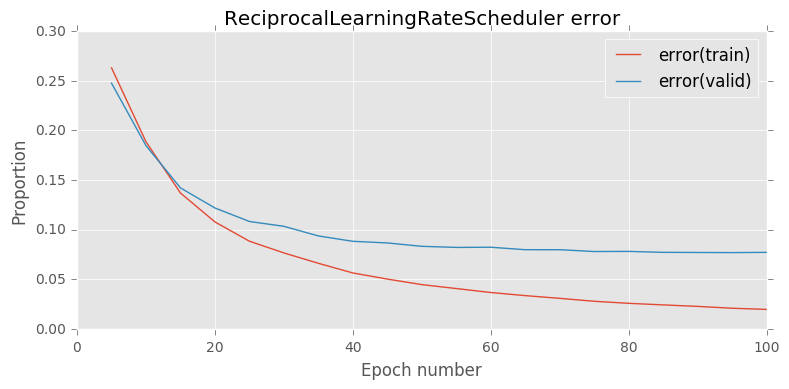

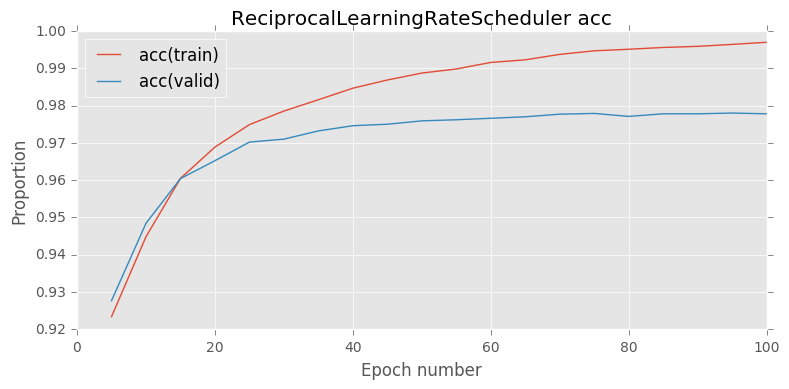

    final error(train) = 1.97e-02
    final error(valid) = 7.72e-02
    final acc(train)   = 9.97e-01
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.38s
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.96s to complete
  error(train)=2.58e-01, acc(train)=9.25e-01, error(valid)=2.45e-01, acc(valid)=9.30e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=1.76e-01, acc(train)=9.48e-01, error(valid)=1.75e-01, acc(valid)=9.51e-01, params_penalty=0.00e+00
Epoch 15: 1.20s to complete
  error(train)=1.30e-01, acc(train)=9.62e-01, error(valid)=1.39e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 20: 1.22s to complete
  error(train)=1.04e-01, acc(train)=9.71e-01, error(valid)=1.22e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 25: 1.20s to complete
  error(train)=8.51e-02, acc(train)=9.76e-01, error(valid)=1.10e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00
Epoch 30: 1.20s to complete
  error(train)=7.01e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 35: 1.20s to complete
  error(train)=5.99e-02, acc(train)=9.84e-01, error(valid)=9.43e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 4

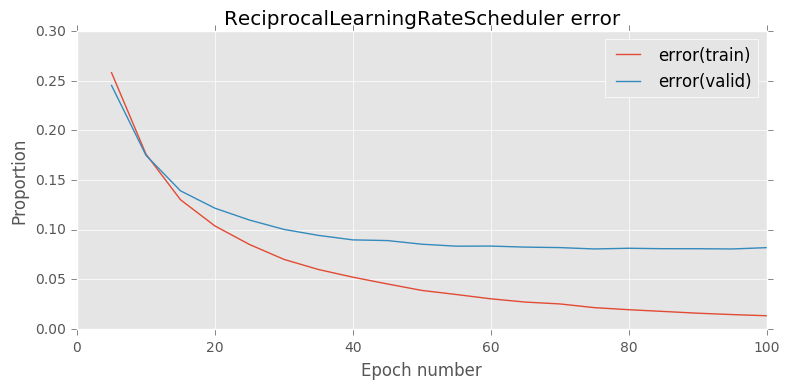

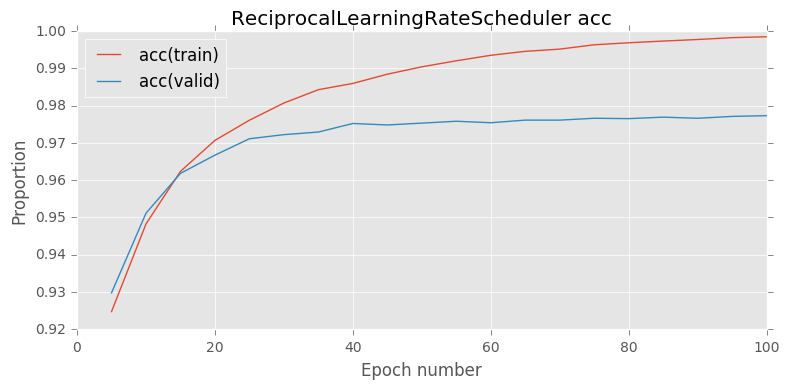

    final error(train) = 1.33e-02
    final error(valid) = 8.19e-02
    final acc(train)   = 9.99e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.42s
Learning_rate0.1
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 1.02e-01           | 1.19e-01           |  0.97            | 0.97             |
| 50.0        | 6.32e-02           | 9.65e-02           |  0.98            | 0.97             |
| 100.0        | 4.71e-02           | 8.74e-02           |  0.99            | 0.97             |
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.22s to complete
  error(train)=9.85e-02, acc(train)=9.70e-01, error(valid)=1.14e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00
Epoch 10: 1.27s to complete
  error(train)=5.16e-02, acc(train)=9.85e-01, error(valid)=9.32e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 15: 1.62s to complete
  error(train)=3.16e-02, acc(train)=9.92e-01, error(valid)=8.33e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 20: 1.26s to complete
  error(train)=1.81e-02, acc(train)=9.96e-01, error(valid)=7.89e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 25: 1.83s to complete
  error(train)=1.21e-02, acc(train)=9.98e-01, error(valid)=7.98e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.55s to complete
  error(train)=8.64e-03, acc(train)=9.99e-01, error(valid)=8.11e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 35: 2.71s to complete
  error(train)=6.54e-03, acc(train)=1.00e+00, error(valid)=8.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4

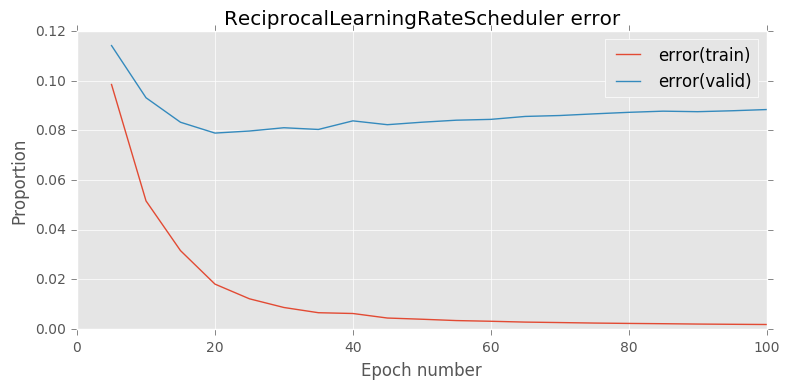

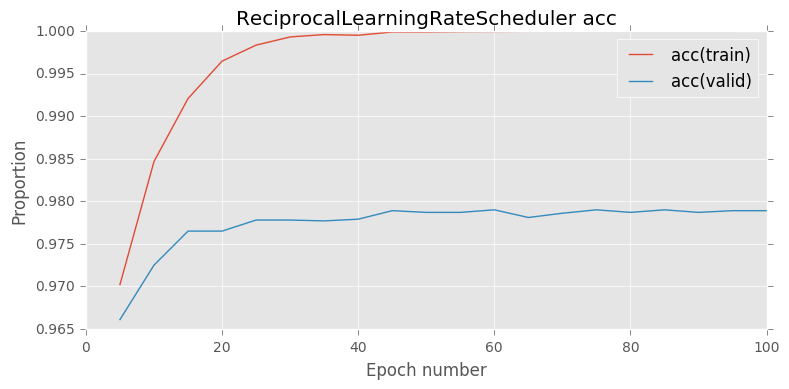

    final error(train) = 1.79e-03
    final error(valid) = 8.84e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.81s
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.49s to complete
  error(train)=8.79e-02, acc(train)=9.75e-01, error(valid)=1.06e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 10: 1.52s to complete
  error(train)=4.30e-02, acc(train)=9.88e-01, error(valid)=8.93e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 15: 1.51s to complete
  error(train)=2.69e-02, acc(train)=9.92e-01, error(valid)=8.86e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 20: 1.48s to complete
  error(train)=1.36e-02, acc(train)=9.98e-01, error(valid)=8.68e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 25: 1.48s to complete
  error(train)=7.48e-03, acc(train)=9.99e-01, error(valid)=8.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.49s to complete
  error(train)=4.72e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.50s to complete
  error(train)=3.40e-03, acc(train)=1.00e+00, error(valid)=8.89e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4

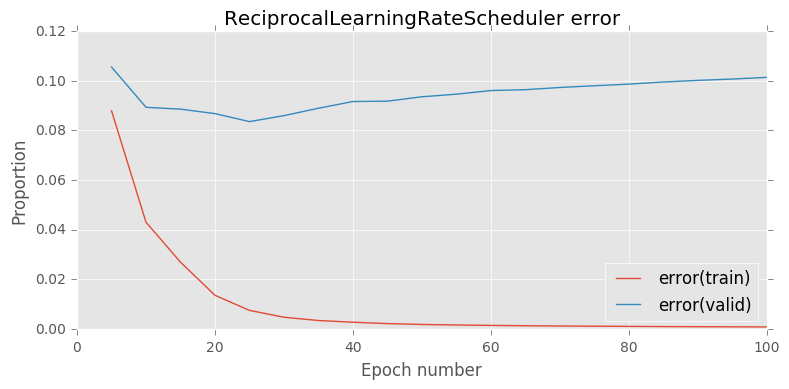

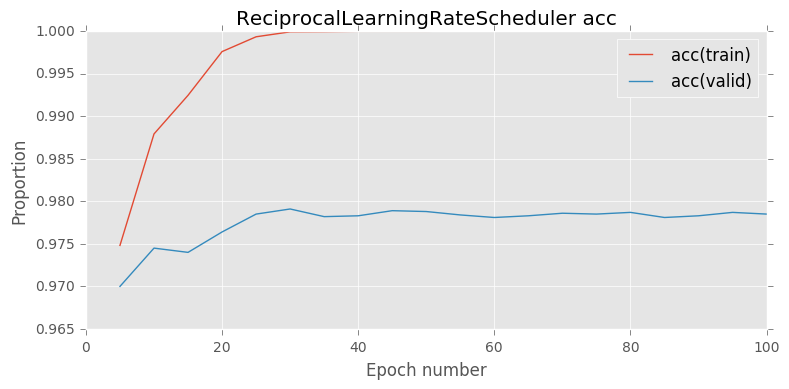

    final error(train) = 8.15e-04
    final error(valid) = 1.01e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.75s
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.50s to complete
  error(train)=9.70e-02, acc(train)=9.71e-01, error(valid)=1.16e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 10: 1.30s to complete
  error(train)=4.83e-02, acc(train)=9.85e-01, error(valid)=9.28e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 15: 1.71s to complete
  error(train)=2.67e-02, acc(train)=9.93e-01, error(valid)=8.58e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 20: 1.53s to complete
  error(train)=1.11e-02, acc(train)=9.98e-01, error(valid)=8.13e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 25: 3.32s to complete
  error(train)=5.72e-03, acc(train)=1.00e+00, error(valid)=8.14e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 30: 1.51s to complete
  error(train)=3.84e-03, acc(train)=1.00e+00, error(valid)=8.64e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 35: 1.51s to complete
  error(train)=2.80e-03, acc(train)=1.00e+00, error(valid)=8.56e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

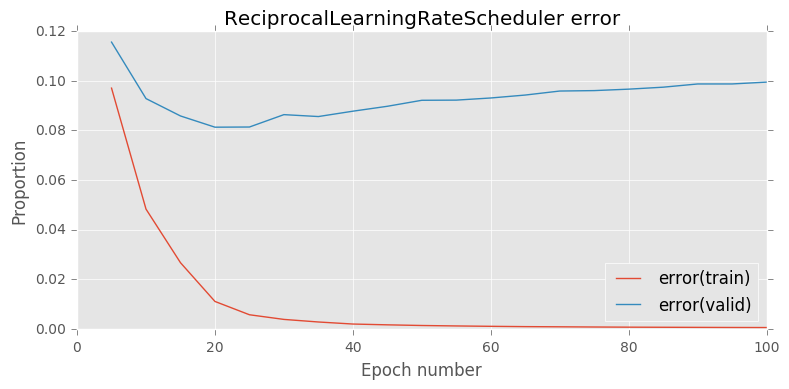

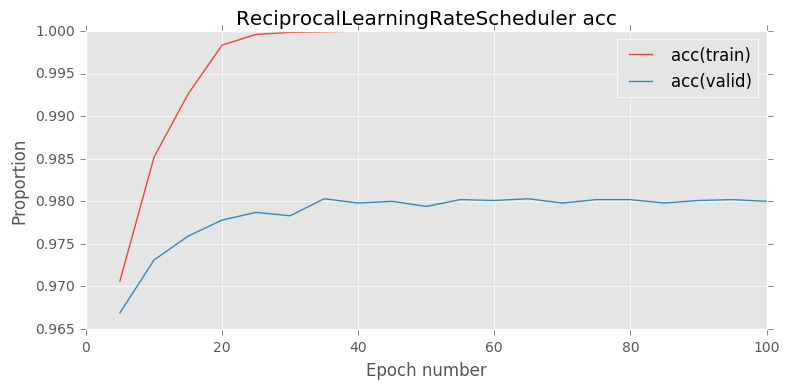

    final error(train) = 5.66e-04
    final error(valid) = 9.95e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.83s
Learning_rate0.5
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 1.02e-01           | 1.19e-01           |  0.97            | 0.97             |
| 50.0        | 6.32e-02           | 9.65e-02           |  0.98            | 0.97             |
| 100.0        | 4.71e-02           | 8.74e-02           |  0.99            | 0.97             |


In [6]:
# ReciprocalLearningRateScheduler--------------double rate loop

num_epochs=100
stats_interval = 5
learning_rates = [0.05, 0.1, 0.5 ]
learning_rate_decays = [20.0,50.0,100.0]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    for learning_rate_decay in learning_rate_decays:
        print('-' * 80)
        print('learning_rate={0:.2f} learning_rate_decay={1:.2f} num_epochs = {2:.2f}'
              .format(learning_rate, learning_rate_decay, num_epochs))
        print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        train_data.reset()
        valid_data.reset()


        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)

        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
        schedule = [ReciprocalLearningRateScheduler(learning_rate=learning_rate,learning_rate_decay=learning_rate_decay)]
        param = str(learning_rate+learning_rate_decay)
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'ReciprocalLearningRateScheduler',param)
    
        plt.show()

        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

        final_errors_train.append(stats[-1, keys['error(train)']])
        final_errors_valid.append(stats[-1, keys['error(valid)']])
        final_accs_train.append(stats[-1, keys['acc(train)']])
        final_accs_valid.append(stats[-1, keys['acc(valid)']])
    
    j = 0
    print('Learning_rate{0}'.format(learning_rate))
    print('| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
    print('|---------------------|--------------------|--------------------|------------------|------------------|')
    for learning_rate_decay in learning_rate_decays:
        print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
              .format(learning_rate_decay, 
                      final_errors_train[j], final_errors_valid[j],
                      final_accs_train[j], final_accs_valid[j]))
        j += 1

--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.73s to complete
  error(train)=3.31e-01, acc(train)=9.05e-01, error(valid)=3.08e-01, acc(valid)=9.12e-01, params_penalty=0.00e+00
Epoch 10: 1.45s to complete
  error(train)=2.53e-01, acc(train)=9.26e-01, error(valid)=2.38e-01, acc(valid)=9.31e-01, params_penalty=0.00e+00
Epoch 15: 1.87s to complete
  error(train)=2.07e-01, acc(train)=9.41e-01, error(valid)=1.98e-01, acc(valid)=9.44e-01, params_penalty=0.00e+00
Epoch 20: 1.35s to complete
  error(train)=1.72e-01, acc(train)=9.50e-01, error(valid)=1.70e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00
Epoch 25: 1.27s to complete
  error(train)=1.44e-01, acc(train)=9.59e-01, error(valid)=1.46e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00
Epoch 30: 1.39s to complete
  error(train)=1.23e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00
Epoch 35: 1.26s to complete
  error(train)=1.06e-01, acc(train)=9.70e-01, error(valid)=1.20e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00
Epoch 4

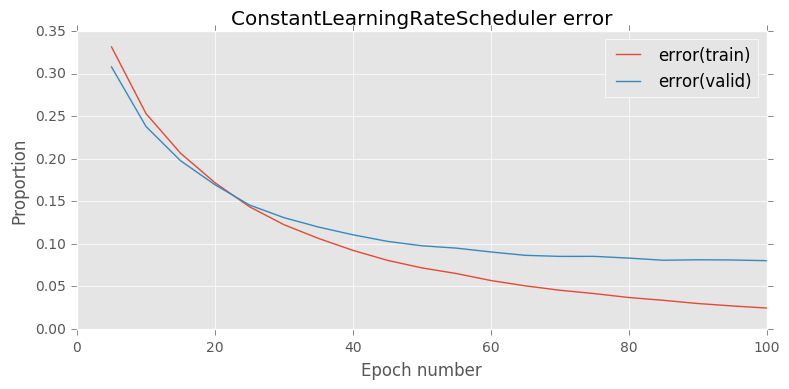

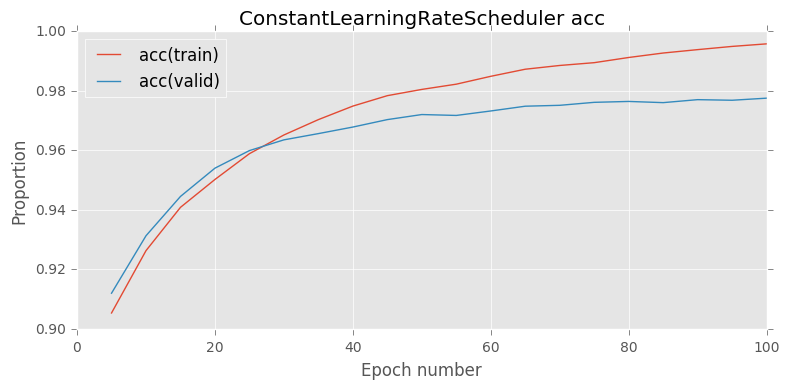

    final error(train) = 2.46e-02
    final error(valid) = 8.02e-02
    final acc(train)   = 9.96e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.61s
--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.23s to complete
  error(train)=3.39e-01, acc(train)=9.04e-01, error(valid)=3.15e-01, acc(valid)=9.10e-01, params_penalty=0.00e+00
Epoch 10: 1.21s to complete
  error(train)=2.56e-01, acc(train)=9.25e-01, error(valid)=2.41e-01, acc(valid)=9.30e-01, params_penalty=0.00e+00
Epoch 15: 1.50s to complete
  error(train)=2.08e-01, acc(train)=9.39e-01, error(valid)=2.00e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00
Epoch 20: 1.27s to complete
  error(train)=1.73e-01, acc(train)=9.50e-01, error(valid)=1.71e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00
Epoch 25: 1.25s to complete
  error(train)=1.46e-01, acc(train)=9.57e-01, error(valid)=1.50e-01, acc(valid)=9.58e-01, params_penalty=0.00e+00
Epoch 30: 1.21s to complete
  error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00
Epoch 35: 1.22s to complete
  error(train)=1.07e-01, acc(train)=9.69e-01, error(valid)=1.22e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00
Epoch 4

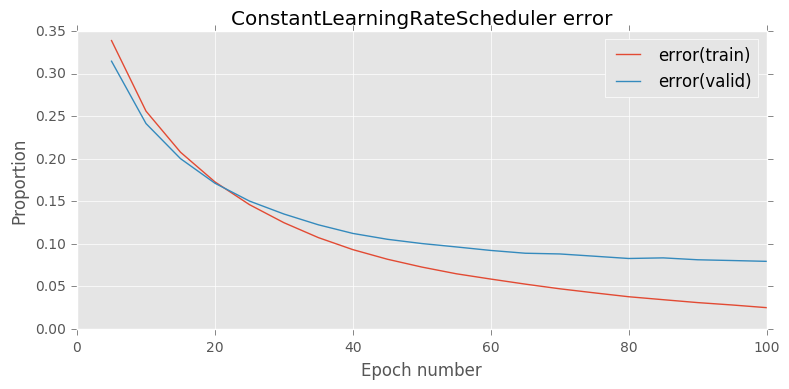

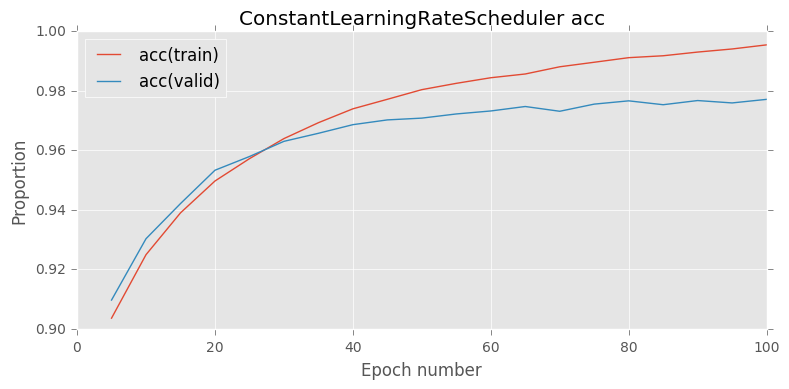

    final error(train) = 2.50e-02
    final error(valid) = 7.95e-02
    final acc(train)   = 9.95e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.45s
--------------------------------------------------------------------------------
learning_rate=0.05 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=3.35e-01, acc(train)=9.05e-01, error(valid)=3.11e-01, acc(valid)=9.11e-01, params_penalty=0.00e+00
Epoch 10: 1.20s to complete
  error(train)=2.54e-01, acc(train)=9.26e-01, error(valid)=2.39e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00
Epoch 15: 1.21s to complete
  error(train)=2.04e-01, acc(train)=9.41e-01, error(valid)=1.94e-01, acc(valid)=9.46e-01, params_penalty=0.00e+00
Epoch 20: 1.20s to complete
  error(train)=1.68e-01, acc(train)=9.51e-01, error(valid)=1.65e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00
Epoch 25: 1.21s to complete
  error(train)=1.42e-01, acc(train)=9.58e-01, error(valid)=1.45e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00
Epoch 30: 1.20s to complete
  error(train)=1.21e-01, acc(train)=9.65e-01, error(valid)=1.29e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00
Epoch 35: 1.21s to complete
  error(train)=1.05e-01, acc(train)=9.70e-01, error(valid)=1.18e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00
Epoch 4

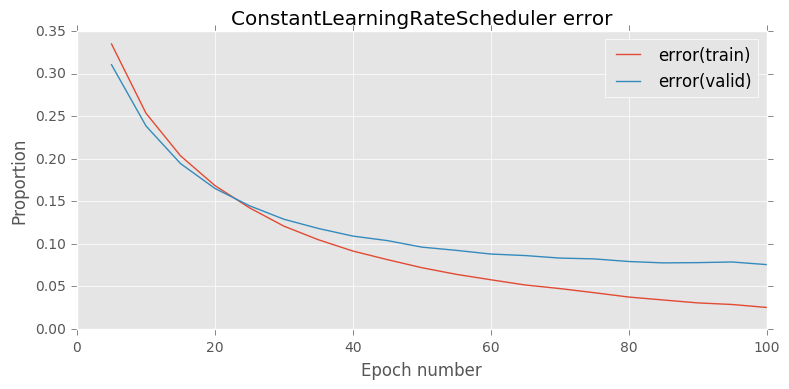

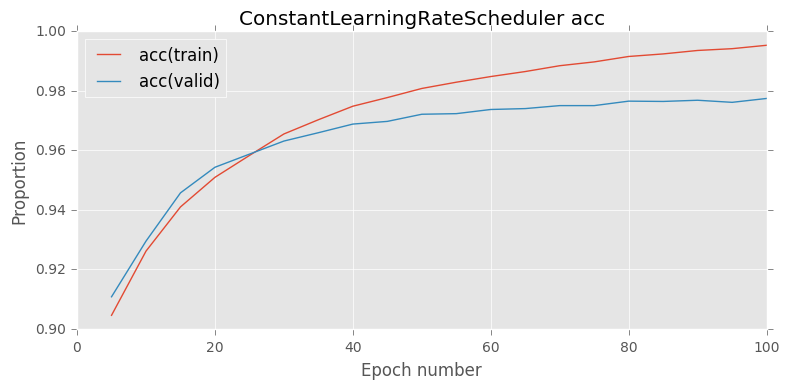

    final error(train) = 2.53e-02
    final error(valid) = 7.56e-02
    final acc(train)   = 9.95e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.42s
Learning_rate0.05
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 2.46e-02           | 8.02e-02           |  1.00            | 0.98             |
| 50.0        | 2.50e-02           | 7.95e-02           |  1.00            | 0.98             |
| 100.0        | 2.53e-02           | 7.56e-02           |  1.00            | 0.98             |
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.23s to complete
  error(train)=2.57e-01, acc(train)=9.24e-01, error(valid)=2.44e-01, acc(valid)=9.28e-01, params_penalty=0.00e+00
Epoch 10: 1.23s to complete
  error(train)=1.79e-01, acc(train)=9.47e-01, error(valid)=1.76e-01, acc(valid)=9.52e-01, params_penalty=0.00e+00
Epoch 15: 1.23s to complete
  error(train)=1.26e-01, acc(train)=9.63e-01, error(valid)=1.33e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 20: 1.23s to complete
  error(train)=9.48e-02, acc(train)=9.73e-01, error(valid)=1.13e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00
Epoch 25: 1.23s to complete
  error(train)=7.39e-02, acc(train)=9.79e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 30: 1.29s to complete
  error(train)=6.09e-02, acc(train)=9.84e-01, error(valid)=9.15e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 35: 1.26s to complete
  error(train)=4.85e-02, acc(train)=9.88e-01, error(valid)=8.54e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00
Epoch 4

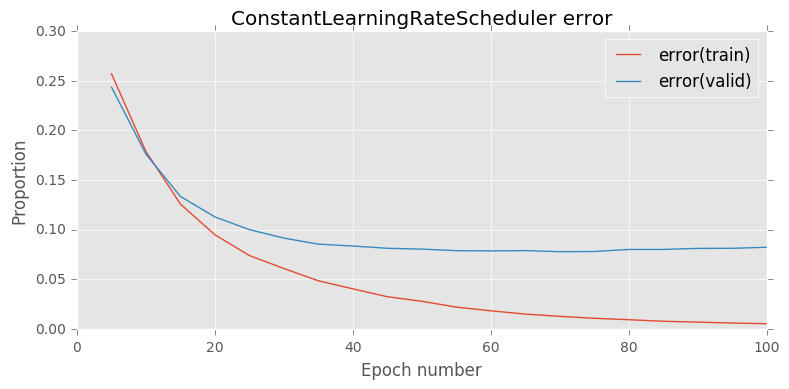

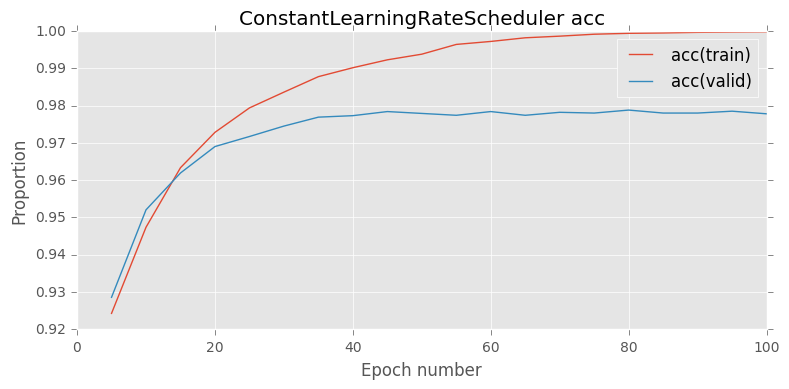

    final error(train) = 5.27e-03
    final error(valid) = 8.23e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.45s
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.26s to complete
  error(train)=2.55e-01, acc(train)=9.26e-01, error(valid)=2.39e-01, acc(valid)=9.29e-01, params_penalty=0.00e+00
Epoch 10: 1.27s to complete
  error(train)=1.73e-01, acc(train)=9.50e-01, error(valid)=1.70e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00
Epoch 15: 1.24s to complete
  error(train)=1.29e-01, acc(train)=9.63e-01, error(valid)=1.38e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 20: 1.24s to complete
  error(train)=1.00e-01, acc(train)=9.71e-01, error(valid)=1.20e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 25: 1.25s to complete
  error(train)=7.64e-02, acc(train)=9.79e-01, error(valid)=1.06e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 30: 1.26s to complete
  error(train)=6.24e-02, acc(train)=9.83e-01, error(valid)=9.71e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 35: 1.28s to complete
  error(train)=5.02e-02, acc(train)=9.87e-01, error(valid)=9.17e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 4

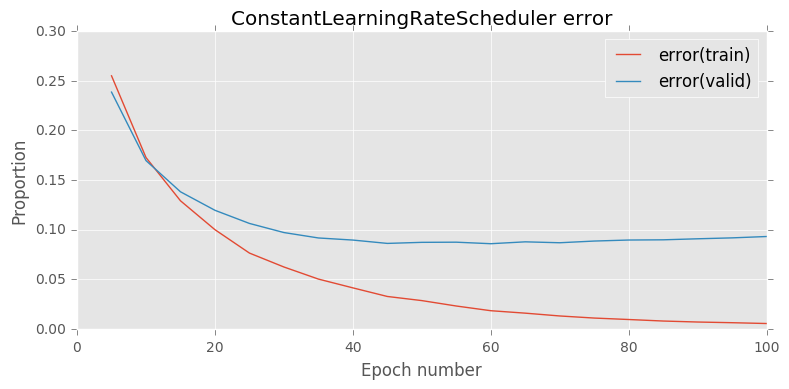

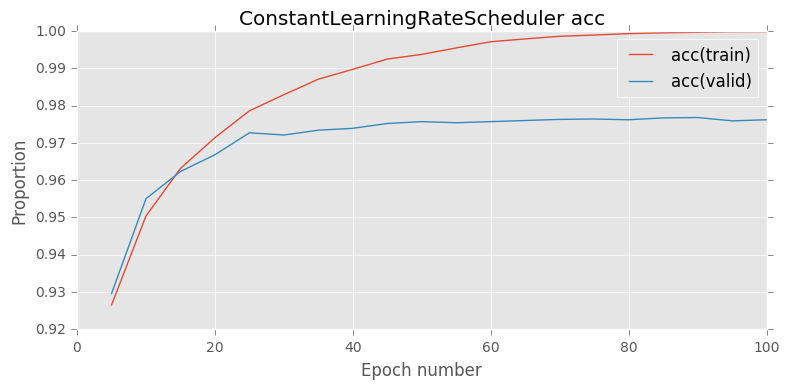

    final error(train) = 5.46e-03
    final error(valid) = 9.31e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.44s
--------------------------------------------------------------------------------
learning_rate=0.10 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 2.61s to complete
  error(train)=2.59e-01, acc(train)=9.25e-01, error(valid)=2.43e-01, acc(valid)=9.28e-01, params_penalty=0.00e+00
Epoch 10: 1.80s to complete
  error(train)=1.77e-01, acc(train)=9.48e-01, error(valid)=1.73e-01, acc(valid)=9.51e-01, params_penalty=0.00e+00
Epoch 15: 1.22s to complete
  error(train)=1.27e-01, acc(train)=9.62e-01, error(valid)=1.35e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 20: 1.22s to complete
  error(train)=9.65e-02, acc(train)=9.72e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00
Epoch 25: 1.21s to complete
  error(train)=8.00e-02, acc(train)=9.77e-01, error(valid)=1.06e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 30: 1.22s to complete
  error(train)=6.15e-02, acc(train)=9.84e-01, error(valid)=9.63e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 35: 1.22s to complete
  error(train)=5.00e-02, acc(train)=9.87e-01, error(valid)=9.01e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 4

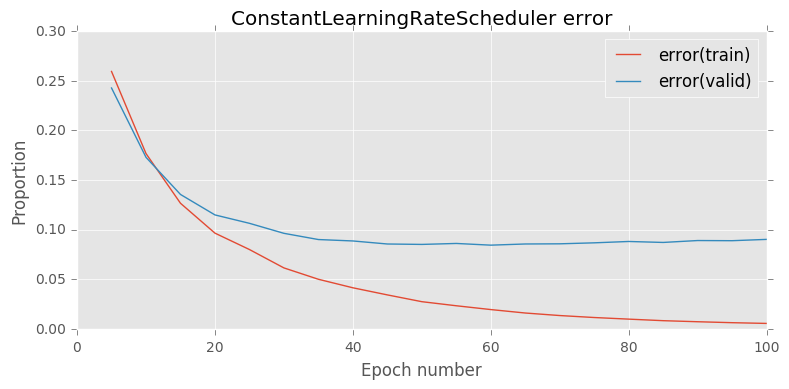

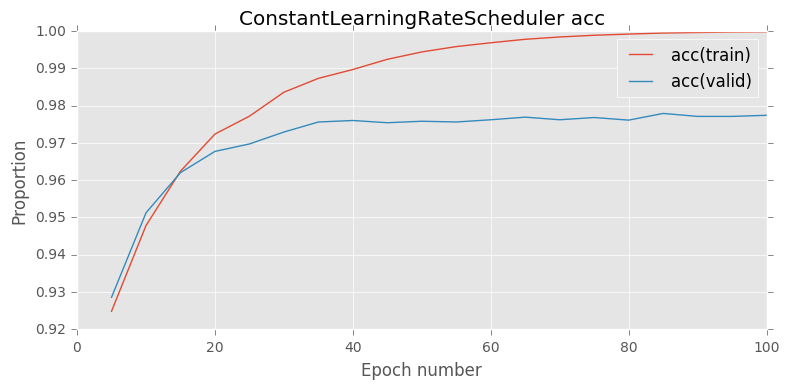

    final error(train) = 5.56e-03
    final error(valid) = 9.02e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.58s
Learning_rate0.1
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 2.46e-02           | 8.02e-02           |  1.00            | 0.98             |
| 50.0        | 2.50e-02           | 7.95e-02           |  1.00            | 0.98             |
| 100.0        | 2.53e-02           | 7.56e-02           |  1.00            | 0.98             |
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=20.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=1.12e-01, acc(train)=9.66e-01, error(valid)=1.35e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 10: 1.21s to complete
  error(train)=4.22e-02, acc(train)=9.88e-01, error(valid)=9.22e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 15: 1.21s to complete
  error(train)=2.64e-02, acc(train)=9.92e-01, error(valid)=9.71e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 20: 1.20s to complete
  error(train)=1.01e-02, acc(train)=9.99e-01, error(valid)=8.32e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 25: 1.29s to complete
  error(train)=5.12e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 2.67s to complete
  error(train)=3.17e-03, acc(train)=1.00e+00, error(valid)=9.15e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.22s to complete
  error(train)=2.03e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 4

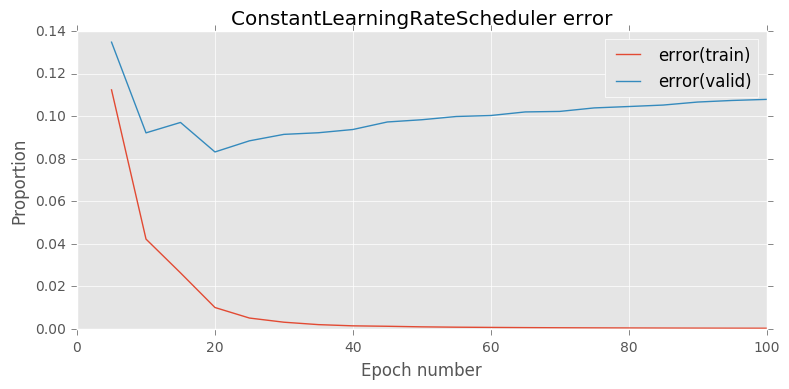

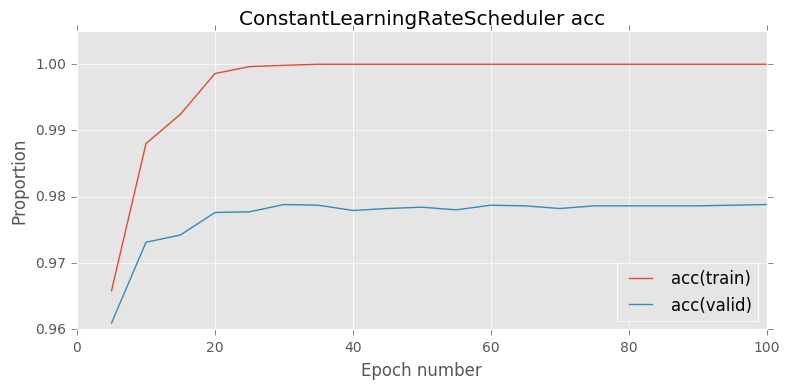

    final error(train) = 3.30e-04
    final error(valid) = 1.08e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.43s
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=50.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.21s to complete
  error(train)=1.04e-01, acc(train)=9.68e-01, error(valid)=1.21e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00
Epoch 10: 1.24s to complete
  error(train)=4.63e-02, acc(train)=9.87e-01, error(valid)=9.77e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 15: 1.21s to complete
  error(train)=2.11e-02, acc(train)=9.95e-01, error(valid)=8.83e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 20: 1.22s to complete
  error(train)=1.01e-02, acc(train)=9.98e-01, error(valid)=8.78e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00
Epoch 25: 1.22s to complete
  error(train)=4.53e-03, acc(train)=1.00e+00, error(valid)=9.12e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.22s to complete
  error(train)=2.75e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.22s to complete
  error(train)=1.96e-03, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4

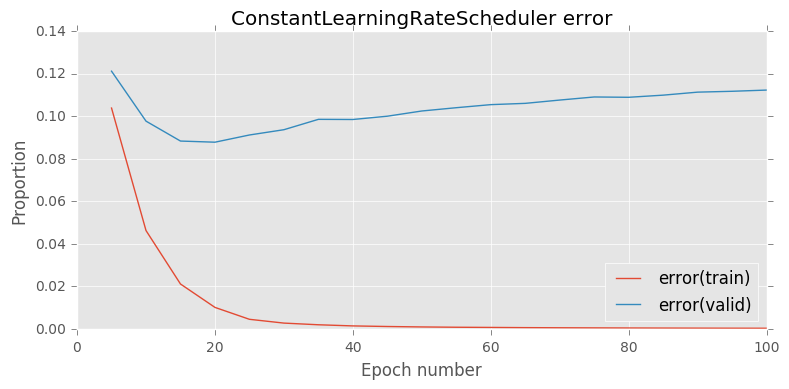

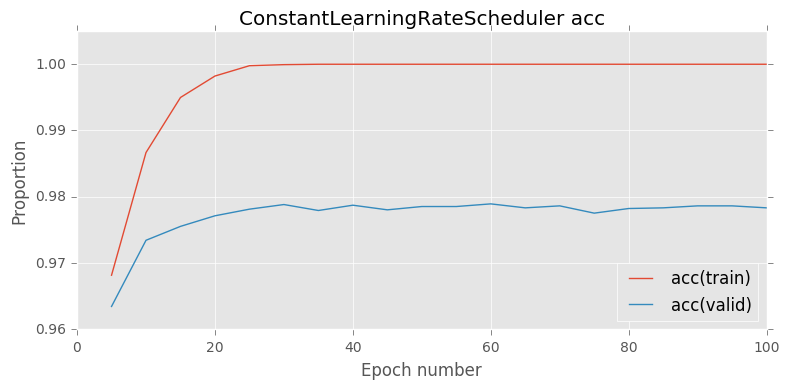

    final error(train) = 3.27e-04
    final error(valid) = 1.12e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.43s
--------------------------------------------------------------------------------
learning_rate=0.50 learning_rate_decay=100.00 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.49s to complete
  error(train)=1.06e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 10: 1.62s to complete
  error(train)=4.43e-02, acc(train)=9.87e-01, error(valid)=9.03e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 15: 1.23s to complete
  error(train)=3.09e-02, acc(train)=9.91e-01, error(valid)=9.68e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 20: 1.23s to complete
  error(train)=1.12e-02, acc(train)=9.98e-01, error(valid)=8.69e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 25: 1.22s to complete
  error(train)=5.24e-03, acc(train)=1.00e+00, error(valid)=9.00e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.22s to complete
  error(train)=3.19e-03, acc(train)=1.00e+00, error(valid)=9.29e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.22s to complete
  error(train)=1.96e-03, acc(train)=1.00e+00, error(valid)=9.52e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 4

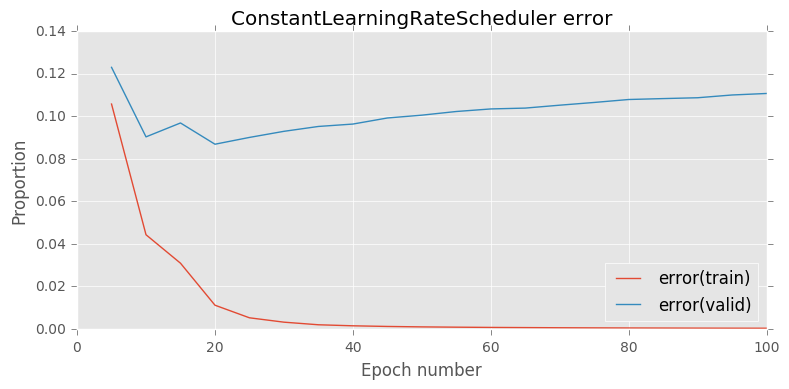

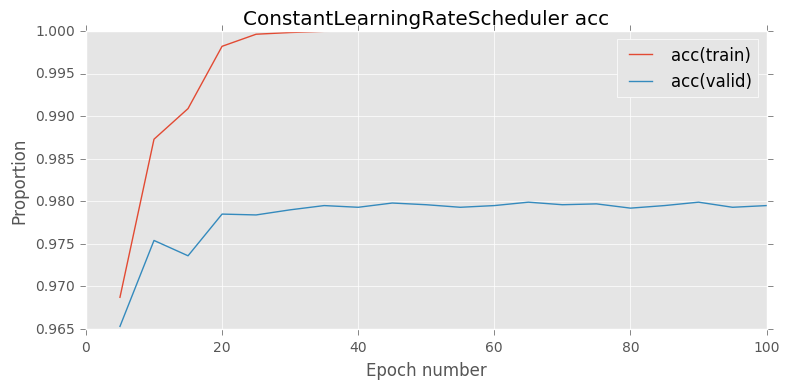

    final error(train) = 3.33e-04
    final error(valid) = 1.11e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.46s
Learning_rate0.5
| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------------|--------------------|--------------------|------------------|------------------|
| 20.0        | 2.46e-02           | 8.02e-02           |  1.00            | 0.98             |
| 50.0        | 2.50e-02           | 7.95e-02           |  1.00            | 0.98             |
| 100.0        | 2.53e-02           | 7.56e-02           |  1.00            | 0.98             |


In [8]:
# ConstantLearningRateScheduler--------------double rate loop

num_epochs=100
stats_interval = 5
learning_rates = [0.05, 0.1, 0.5 ]
learning_rate_decays = [20.0,50.0,100.0]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    for learning_rate_decay in learning_rate_decays:
        print('-' * 80)
        print('learning_rate={0:.2f} learning_rate_decay={1:.2f} num_epochs = {2:.2f}'
              .format(learning_rate, learning_rate_decay, num_epochs))
        print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        train_data.reset()
        valid_data.reset()


        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)

        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
        schedule = [ConstantLearningRateScheduler(learning_rate=learning_rate)]
        param = str(learning_rate+learning_rate_decay)
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'ConstantLearningRateScheduler',param)
    
        plt.show()

        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

        final_errors_train.append(stats[-1, keys['error(train)']])
        final_errors_valid.append(stats[-1, keys['error(valid)']])
        final_accs_train.append(stats[-1, keys['acc(train)']])
        final_accs_valid.append(stats[-1, keys['acc(valid)']])
    
    j = 0
    print('Learning_rate{0}'.format(learning_rate))
    print('| learning_rate_decay | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
    print('|---------------------|--------------------|--------------------|------------------|------------------|')
    for learning_rate_decay in learning_rate_decays:
        print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
              .format(learning_rate_decay, 
                      final_errors_train[j], final_errors_valid[j],
                      final_accs_train[j], final_accs_valid[j]))
        j += 1    

## Part 2: Momentum learning rule

In [14]:
#import different package
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule, MomentumLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.schedulers import ExponentialLearningRateScheduler, ConstantLearningRateScheduler, ReciprocalLearningRateScheduler, MomentumRateSchedule
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
%matplotlib inline
plt.style.use('ggplot')

In [15]:
#define a function that can show the plot
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule, title,param):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedule)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.grid('on')
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Proportion')
    ax_1.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' error')
    fig_1.tight_layout()
    fig_1.savefig(title+param+'train.svg')
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.grid('on')
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Proportion')
    ax_2.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' acc')
    fig_2.tight_layout()
    fig_2.savefig(title+param+'valid.svg')
    
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [16]:
#------------------load data--------------------#
input_dim, output_dim, hidden_dim = 784, 10, 100
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.47s to complete
  error(train)=6.12e-02, acc(train)=9.81e-01, error(valid)=9.75e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00
Epoch 10: 1.49s to complete
  error(train)=2.82e-02, acc(train)=9.92e-01, error(valid)=9.68e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 15: 1.50s to complete
  error(train)=9.77e-03, acc(train)=9.98e-01, error(valid)=9.53e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 20: 1.35s to complete
  error(train)=1.94e-03, acc(train)=1.00e+00, error(valid)=9.29e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00
Epoch 25: 1.33s to complete
  error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.33s to complete
  error(train)=7.09e-04, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 35: 1.34s to complete
  error(train)=5.50e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4

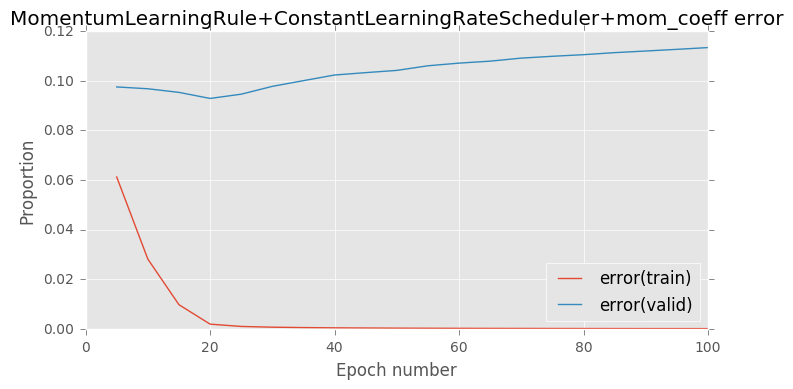

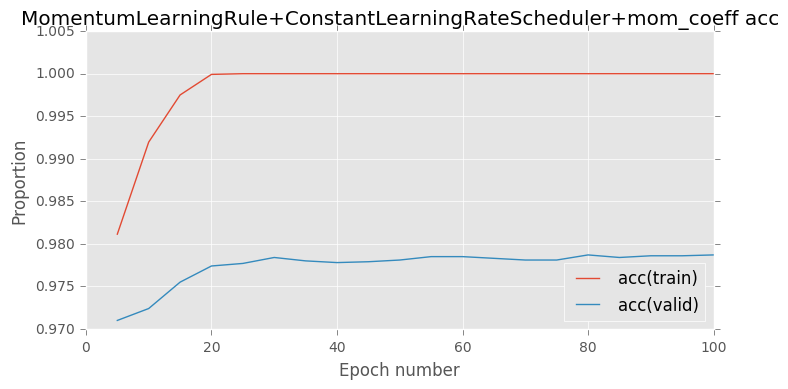

    final error(train) = 1.28e-04
    final error(valid) = 1.13e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.69s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.50 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.35s to complete
  error(train)=1.74e-01, acc(train)=9.49e-01, error(valid)=1.73e-01, acc(valid)=9.51e-01, params_penalty=0.00e+00
Epoch 10: 1.34s to complete
  error(train)=1.00e-01, acc(train)=9.72e-01, error(valid)=1.19e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00
Epoch 15: 1.35s to complete
  error(train)=6.67e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00
Epoch 20: 1.35s to complete
  error(train)=4.75e-02, acc(train)=9.87e-01, error(valid)=9.38e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 25: 1.40s to complete
  error(train)=3.24e-02, acc(train)=9.93e-01, error(valid)=8.47e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 30: 1.36s to complete
  error(train)=2.41e-02, acc(train)=9.95e-01, error(valid)=8.56e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 35: 1.36s to complete
  error(train)=1.69e-02, acc(train)=9.97e-01, error(valid)=8.71e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 4

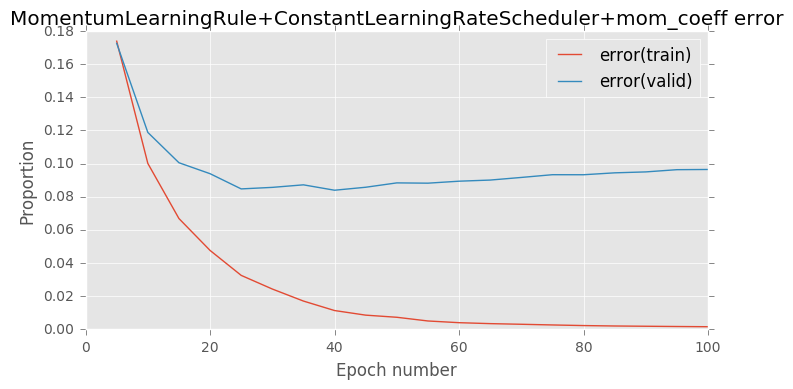

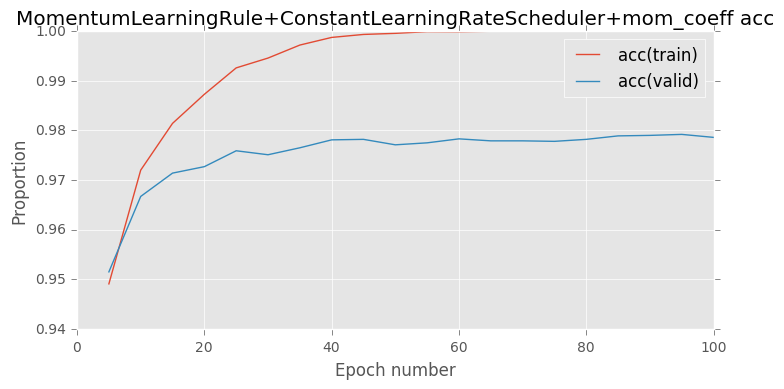

    final error(train) = 1.34e-03
    final error(valid) = 9.64e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.68s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.92s to complete
  error(train)=2.40e-01, acc(train)=9.31e-01, error(valid)=2.28e-01, acc(valid)=9.34e-01, params_penalty=0.00e+00
Epoch 10: 1.70s to complete
  error(train)=1.59e-01, acc(train)=9.55e-01, error(valid)=1.60e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00
Epoch 15: 1.41s to complete
  error(train)=1.15e-01, acc(train)=9.67e-01, error(valid)=1.29e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 20: 1.76s to complete
  error(train)=8.90e-02, acc(train)=9.75e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00
Epoch 25: 1.51s to complete
  error(train)=6.93e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 30: 1.86s to complete
  error(train)=5.60e-02, acc(train)=9.85e-01, error(valid)=9.43e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 35: 1.41s to complete
  error(train)=4.61e-02, acc(train)=9.88e-01, error(valid)=9.35e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 4

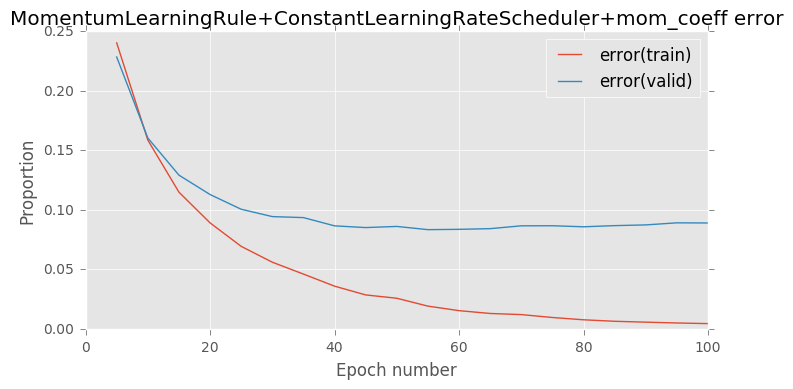

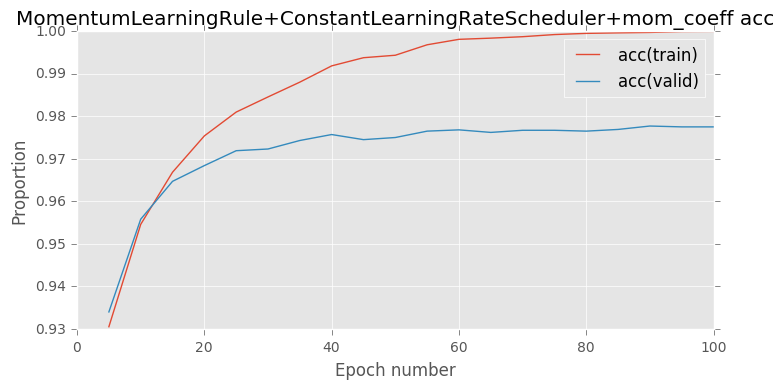

    final error(train) = 4.47e-03
    final error(valid) = 8.90e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.82s
| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----------|--------------------|--------------------|------------------|------------------|
| 0.9        | 1.28e-04           | 1.13e-01           |  1.00            | 0.98             |
| 0.5        | 1.34e-03           | 9.64e-02           |  1.00            | 0.98             |
| 0.1        | 4.47e-03           | 8.90e-02           |  1.00            | 0.98             |


In [20]:
# mom_coeffs--------------double rate loop

num_epochs=100
stats_interval = 5
learning_rate = 0.1
mom_coeffs = [0.9,0.5,0.1]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for mom_coeff in mom_coeffs:
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} num_epochs = {2:.2f}'
          .format(learning_rate, mom_coeff, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff=mom_coeff)
    schedule = [ConstantLearningRateScheduler(learning_rate=learning_rate)]
    param=str(mom_coeff)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'MomentumLearningRule+ConstantLearningRateScheduler+mom_coeff',param)
    
    plt.show()

    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----------|--------------------|--------------------|------------------|------------------|')
for mom_coeff in mom_coeffs:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(mom_coeff, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1
    

In [15]:
#import different package
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule, MomentumLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.schedulers import ExponentialLearningRateScheduler, ConstantLearningRateScheduler, ReciprocalLearningRateScheduler, MomentumRateSchedule
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
%matplotlib inline
plt.style.use('ggplot')

In [16]:
#define a function that can show the plot
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule, title,param):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedule)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.grid('on')
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Proportion')
    ax_1.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' error')
    fig_1.tight_layout()
    fig_1.savefig(title+param+'train.svg')
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.grid('on')
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Proportion')
    ax_2.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' acc')
    fig_2.tight_layout()
    fig_2.savefig(title+param+'valid.svg')
    
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [17]:
#------------------load data--------------------#
input_dim, output_dim, hidden_dim = 784, 10, 100
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 0.85s to complete
  error(train)=1.22e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 10: 0.85s to complete
  error(train)=5.59e-02, acc(train)=9.84e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 15: 0.85s to complete
  error(train)=2.42e-02, acc(train)=9.93e-01, error(valid)=9.30e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 20: 1.05s to complete
  error(train)=1.34e-02, acc(train)=9.96e-01, error(valid)=9.85e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 0.84s to complete
  error(train)=2.43e-03, acc(train)=1.00e+00, error(valid)=9.06e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 30: 0.86s to complete
  error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 35: 0.86s to complete
  error(train)=8.59e-04, acc(train)=1.00e+00, error(valid)=9.62e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

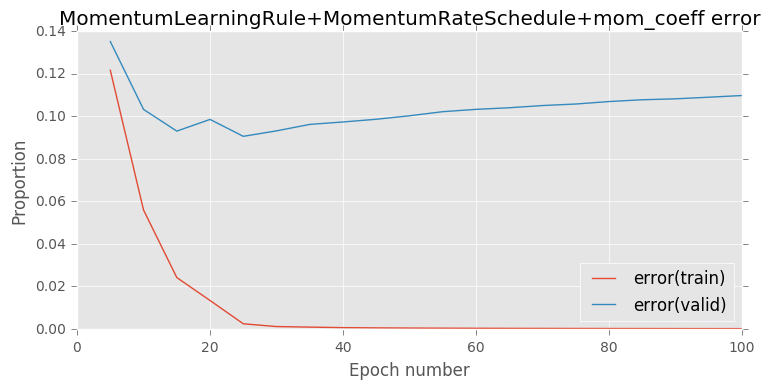

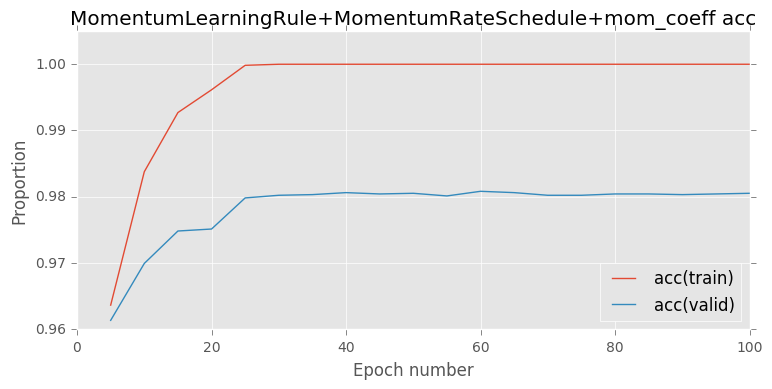

    final error(train) = 1.50e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.38s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.50 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.37s to complete
  error(train)=1.96e-01, acc(train)=9.43e-01, error(valid)=1.91e-01, acc(valid)=9.46e-01, params_penalty=0.00e+00
Epoch 10: 0.97s to complete
  error(train)=1.11e-01, acc(train)=9.68e-01, error(valid)=1.26e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00
Epoch 15: 1.22s to complete
  error(train)=7.39e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 20: 0.90s to complete
  error(train)=5.28e-02, acc(train)=9.86e-01, error(valid)=9.65e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 25: 0.92s to complete
  error(train)=3.61e-02, acc(train)=9.91e-01, error(valid)=8.61e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 30: 1.12s to complete
  error(train)=2.69e-02, acc(train)=9.94e-01, error(valid)=8.66e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 35: 1.54s to complete
  error(train)=1.88e-02, acc(train)=9.97e-01, error(valid)=8.77e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00
Epoch 4

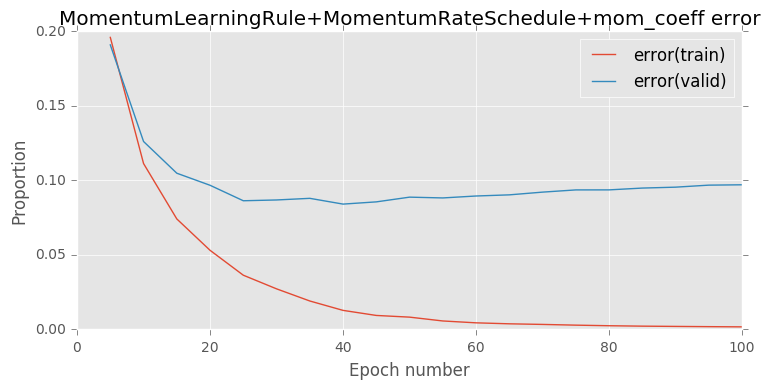

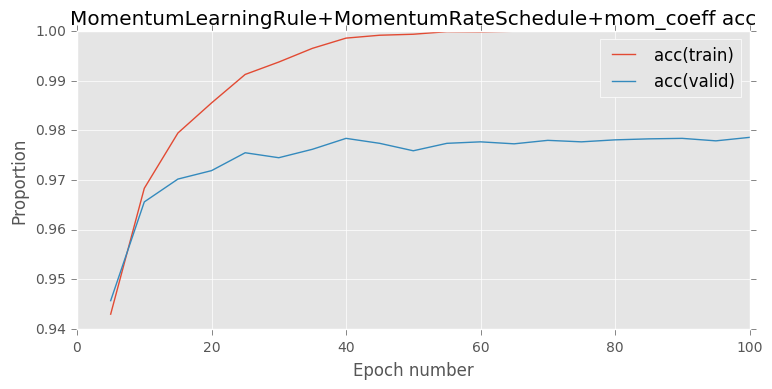

    final error(train) = 1.40e-03
    final error(valid) = 9.68e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.24s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.12s to complete
  error(train)=2.43e-01, acc(train)=9.30e-01, error(valid)=2.31e-01, acc(valid)=9.32e-01, params_penalty=0.00e+00
Epoch 10: 1.12s to complete
  error(train)=1.60e-01, acc(train)=9.54e-01, error(valid)=1.62e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00
Epoch 15: 0.87s to complete
  error(train)=1.16e-01, acc(train)=9.66e-01, error(valid)=1.30e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00
Epoch 20: 0.97s to complete
  error(train)=8.99e-02, acc(train)=9.75e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00
Epoch 25: 1.01s to complete
  error(train)=7.00e-02, acc(train)=9.81e-01, error(valid)=1.01e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 30: 0.94s to complete
  error(train)=5.66e-02, acc(train)=9.85e-01, error(valid)=9.46e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 35: 0.92s to complete
  error(train)=4.65e-02, acc(train)=9.88e-01, error(valid)=9.37e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 4

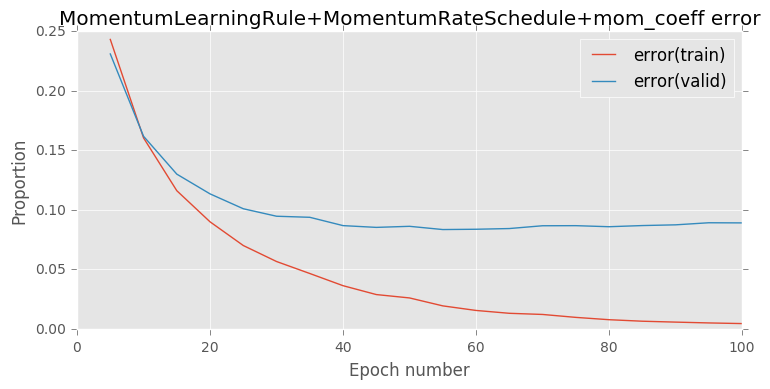

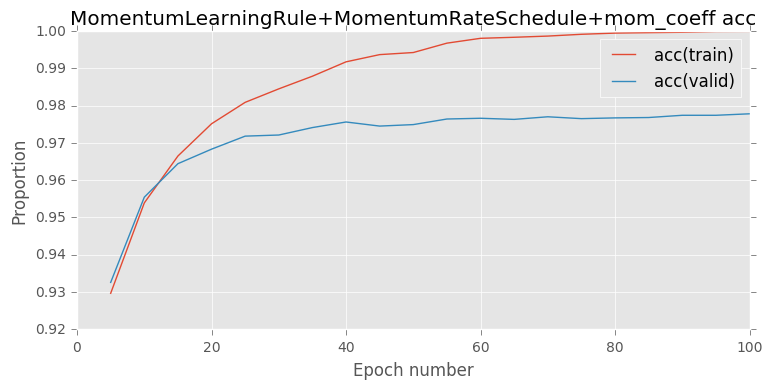

    final error(train) = 4.51e-03
    final error(valid) = 8.90e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.06s
| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----------|--------------------|--------------------|------------------|------------------|
| 0.9        | 1.50e-04           | 1.10e-01           |  1.00            | 0.98             |
| 0.5        | 1.40e-03           | 9.68e-02           |  1.00            | 0.98             |
| 0.1        | 4.51e-03           | 8.90e-02           |  1.00            | 0.98             |


In [19]:
# ---------------mom_coeff change--------------

num_epochs=100
stats_interval = 5
learning_rate = 0.1
mom_coeffs = [0.9,0.5,0.1]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for mom_coeff in mom_coeffs:
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} num_epochs = {2:.2f}'
          .format(learning_rate, mom_coeff, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff=mom_coeff)
    schedule = [MomentumRateSchedule(mom_coeff,0.5,1)]
    param='mom_coeff'+str(mom_coeff)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'MomentumLearningRule+MomentumRateSchedule+mom_coeff',param)
    
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----------|--------------------|--------------------|------------------|------------------|')
for mom_coeff in mom_coeffs:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(mom_coeff, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1
    

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.90 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.49s to complete
  error(train)=1.52e-01, acc(train)=9.55e-01, error(valid)=1.57e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00
Epoch 10: 1.43s to complete
  error(train)=6.89e-02, acc(train)=9.80e-01, error(valid)=1.07e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 15: 1.39s to complete
  error(train)=3.34e-02, acc(train)=9.90e-01, error(valid)=9.42e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 20: 1.71s to complete
  error(train)=1.31e-02, acc(train)=9.97e-01, error(valid)=9.31e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 2.55s to complete
  error(train)=4.79e-03, acc(train)=9.99e-01, error(valid)=9.35e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 30: 1.41s to complete
  error(train)=1.64e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 35: 1.45s to complete
  error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00
Epoch 4

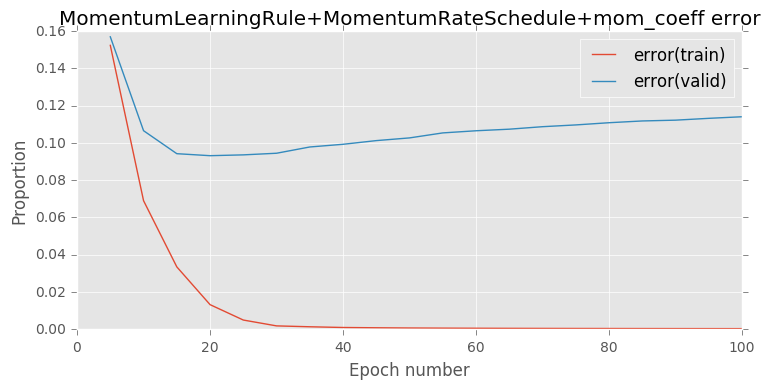

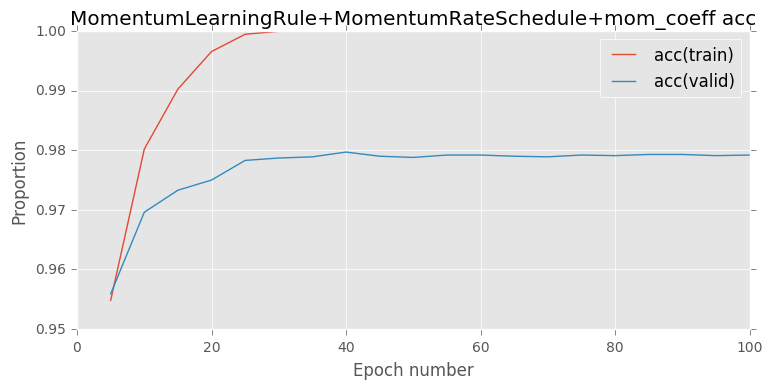

    final error(train) = 1.68e-04
    final error(valid) = 1.14e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.69s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.50 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.33s to complete
  error(train)=1.22e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 10: 1.33s to complete
  error(train)=5.59e-02, acc(train)=9.84e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 15: 1.39s to complete
  error(train)=2.42e-02, acc(train)=9.93e-01, error(valid)=9.30e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 20: 1.34s to complete
  error(train)=1.34e-02, acc(train)=9.96e-01, error(valid)=9.85e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 1.34s to complete
  error(train)=2.43e-03, acc(train)=1.00e+00, error(valid)=9.06e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 30: 1.35s to complete
  error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 35: 1.34s to complete
  error(train)=8.59e-04, acc(train)=1.00e+00, error(valid)=9.62e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

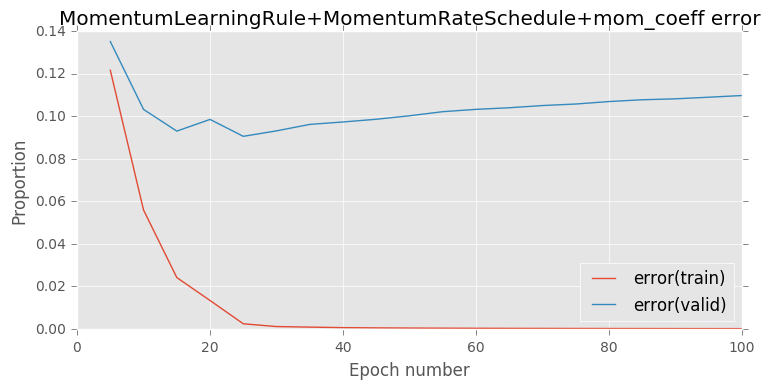

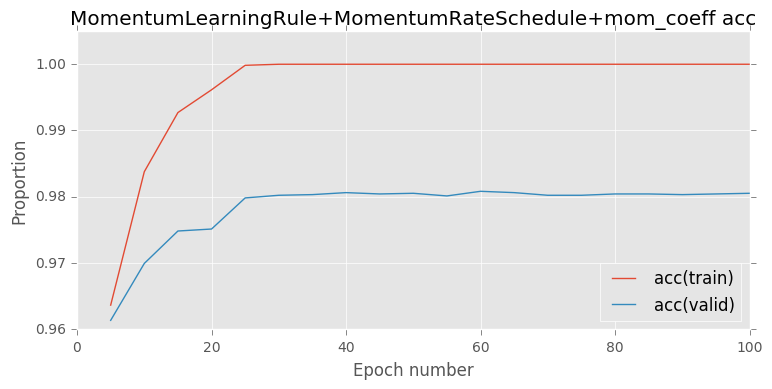

    final error(train) = 1.50e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.57s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.32s to complete
  error(train)=8.01e-02, acc(train)=9.76e-01, error(valid)=1.11e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00
Epoch 10: 1.32s to complete
  error(train)=3.33e-02, acc(train)=9.91e-01, error(valid)=9.73e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00
Epoch 15: 1.31s to complete
  error(train)=1.14e-02, acc(train)=9.97e-01, error(valid)=9.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 20: 1.32s to complete
  error(train)=2.33e-03, acc(train)=1.00e+00, error(valid)=8.81e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 25: 1.31s to complete
  error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=9.12e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 30: 1.32s to complete
  error(train)=7.83e-04, acc(train)=1.00e+00, error(valid)=9.41e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 35: 1.31s to complete
  error(train)=6.12e-04, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

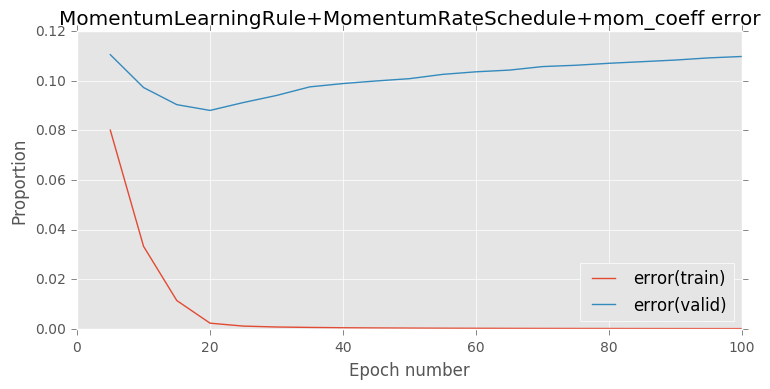

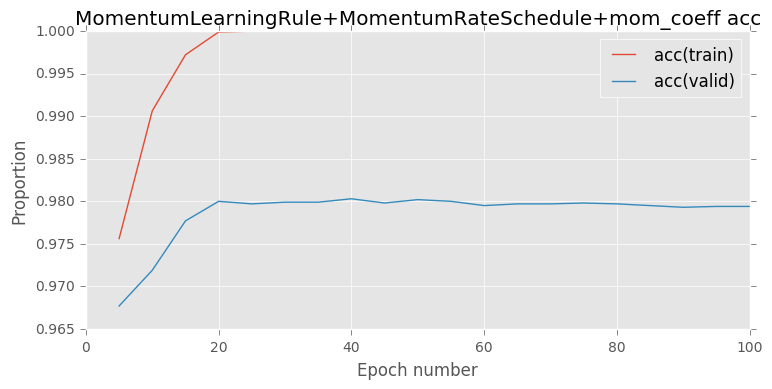

    final error(train) = 1.33e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.52s
| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----------|--------------------|--------------------|------------------|------------------|
| 0.9        | 1.68e-04           | 1.14e-01           |  1.00            | 0.98             |
| 0.5        | 1.50e-04           | 1.10e-01           |  1.00            | 0.98             |
| 0.1        | 1.33e-04           | 1.10e-01           |  1.00            | 0.98             |


In [5]:
# ---------------mom_coeff change--------------

num_epochs=100
stats_interval = 5
learning_rate = 0.1
speedups = [0.9,0.5,0.1]
mom_coeff=0.9
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for speedup in speedups:
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} num_epochs = {2:.2f}'
          .format(learning_rate, speedup, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff=mom_coeff)
    schedule = [MomentumRateSchedule(mom_coeff,speedup,1)]
    param=str(speedup)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'MomentumLearningRule+MomentumRateSchedule+mom_coeff',param)
    
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----------|--------------------|--------------------|------------------|------------------|')
for speedup in speedups:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(speedup, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1
    

--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.35s to complete
  error(train)=1.22e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00
Epoch 10: 1.38s to complete
  error(train)=5.59e-02, acc(train)=9.84e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 15: 1.33s to complete
  error(train)=2.42e-02, acc(train)=9.93e-01, error(valid)=9.30e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 20: 1.33s to complete
  error(train)=1.34e-02, acc(train)=9.96e-01, error(valid)=9.85e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 1.33s to complete
  error(train)=2.43e-03, acc(train)=1.00e+00, error(valid)=9.06e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 30: 1.32s to complete
  error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 35: 1.32s to complete
  error(train)=8.59e-04, acc(train)=1.00e+00, error(valid)=9.62e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

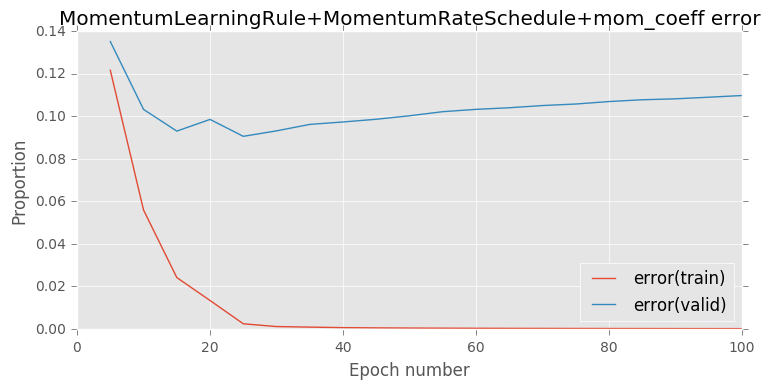

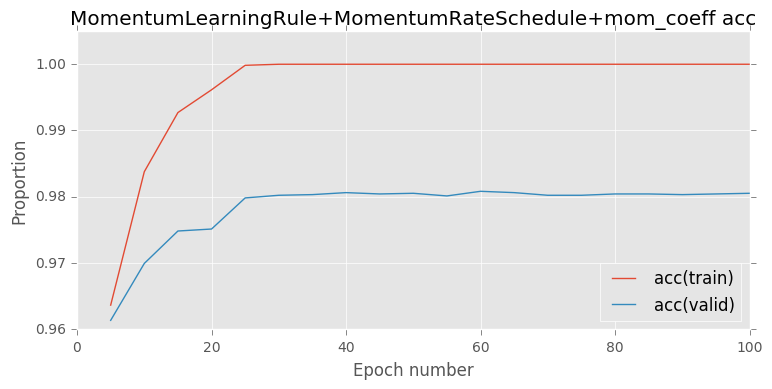

    final error(train) = 1.50e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.52s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 2.75s to complete
  error(train)=1.14e-01, acc(train)=9.66e-01, error(valid)=1.30e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 10: 1.32s to complete
  error(train)=5.34e-02, acc(train)=9.84e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 15: 1.32s to complete
  error(train)=2.15e-02, acc(train)=9.94e-01, error(valid)=9.19e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 20: 1.32s to complete
  error(train)=1.25e-02, acc(train)=9.96e-01, error(valid)=1.00e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 1.32s to complete
  error(train)=2.08e-03, acc(train)=1.00e+00, error(valid)=9.11e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 30: 1.32s to complete
  error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=9.33e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 35: 1.32s to complete
  error(train)=8.54e-04, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

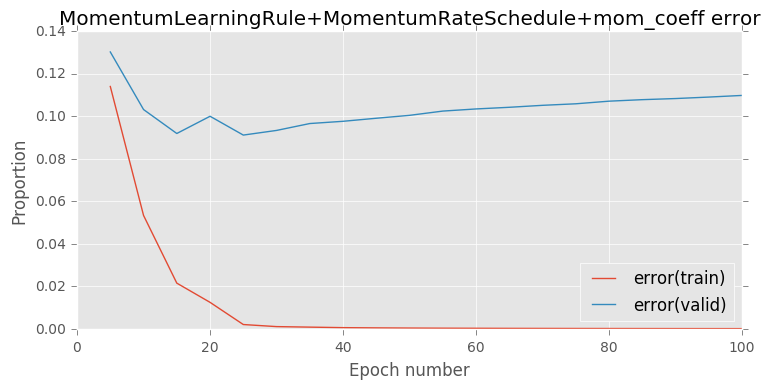

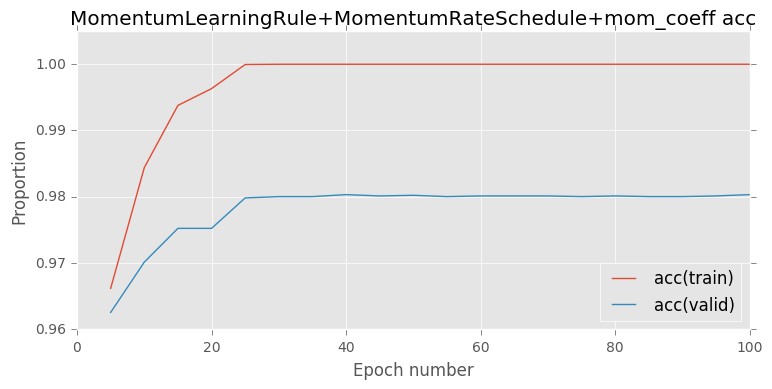

    final error(train) = 1.49e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 1.53s
--------------------------------------------------------------------------------
learning_rate=0.10 mom_coeff=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.33s to complete
  error(train)=1.08e-01, acc(train)=9.68e-01, error(valid)=1.27e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00
Epoch 10: 1.34s to complete
  error(train)=5.04e-02, acc(train)=9.85e-01, error(valid)=1.02e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00
Epoch 15: 1.32s to complete
  error(train)=2.30e-02, acc(train)=9.93e-01, error(valid)=9.59e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 20: 1.33s to complete
  error(train)=1.29e-02, acc(train)=9.96e-01, error(valid)=1.02e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 1.34s to complete
  error(train)=1.91e-03, acc(train)=1.00e+00, error(valid)=9.10e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 30: 1.34s to complete
  error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 35: 1.33s to complete
  error(train)=8.45e-04, acc(train)=1.00e+00, error(valid)=9.69e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00
Epoch 4

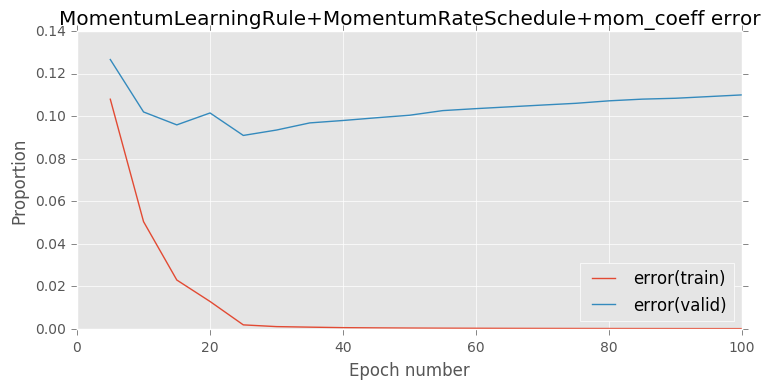

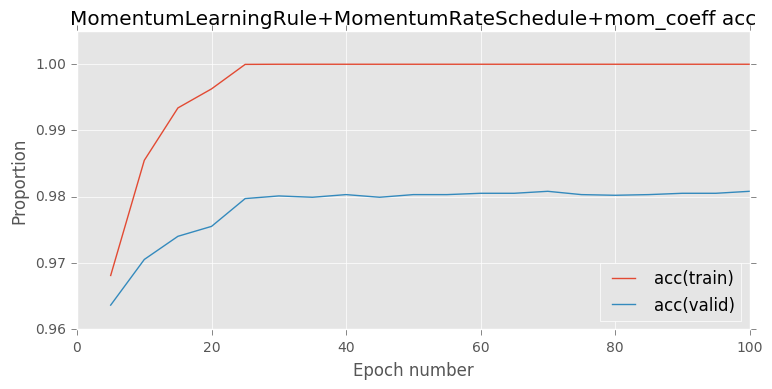

    final error(train) = 1.50e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.81e-01
    run time per epoch = 1.55s
| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----------|--------------------|--------------------|------------------|------------------|
| 1.0        | 1.50e-04           | 1.10e-01           |  1.00            | 0.98             |
| 1.5        | 1.49e-04           | 1.10e-01           |  1.00            | 0.98             |
| 2.0        | 1.50e-04           | 1.10e-01           |  1.00            | 0.98             |


In [6]:
# ---------------mom_coeff change--------------

num_epochs=100
stats_interval = 5
learning_rate = 0.1
speeddowns = [1.0,1.5,2.0]
mom_coeff=0.9
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for speeddown in speeddowns:
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} num_epochs = {2:.2f}'
          .format(learning_rate, speedup, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff=mom_coeff)
    schedule = [MomentumRateSchedule(mom_coeff,0.5,speeddown)]
    param=str(speeddown)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'MomentumLearningRule+MomentumRateSchedule+mom_coeff',param)
    
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----------|--------------------|--------------------|------------------|------------------|')
for speeddown in speeddowns:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(speeddown, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1
    

## Part 3: Adaptive learning rules

In [1]:
#import different package
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import UniformInit
from mlp.learning_rules import GradientDescentLearningRule,AdaGradLearningRule,RMSPropLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.schedulers import ExponentialLearningRateScheduler, ConstantLearningRateScheduler, ReciprocalLearningRateScheduler
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#define a function that can show the plot
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule, title,param):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedule)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.grid('on')
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Proportion')
    ax_1.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' error')
    fig_1.tight_layout()
    fig_1.savefig(title+param+'acc.svg')
    
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.grid('on')
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Proportion')
    ax_2.set_xlabel('Epoch number')
    plt.subplots_adjust(top=0.9)
    plt.title(title+' acc')
    fig_2.tight_layout()
    fig_2.savefig(title+param+'error.svg')
    
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
#------------------load data--------------------#
input_dim, output_dim, hidden_dim = 784, 10, 100
# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

--------------------------------------------------------------------------------
learning_rate=0.01 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.62s to complete
  error(train)=2.33e+00, acc(train)=9.68e-02, error(valid)=2.33e+00, acc(valid)=1.01e-01, params_penalty=0.00e+00
Epoch 10: 1.53s to complete
  error(train)=2.32e+00, acc(train)=9.94e-02, error(valid)=2.32e+00, acc(valid)=9.90e-02, params_penalty=0.00e+00
Epoch 15: 1.28s to complete
  error(train)=2.31e+00, acc(train)=9.98e-02, error(valid)=2.31e+00, acc(valid)=9.61e-02, params_penalty=0.00e+00
Epoch 20: 1.42s to complete
  error(train)=2.31e+00, acc(train)=1.04e-01, error(valid)=2.31e+00, acc(valid)=1.09e-01, params_penalty=0.00e+00
Epoch 25: 1.31s to complete
  error(train)=2.31e+00, acc(train)=1.14e-01, error(valid)=2.31e+00, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 30: 1.47s to complete
  error(train)=2.31e+00, acc(train)=9.94e-02, error(valid)=2.31e+00, acc(valid)=9.90e-02, params_penalty=0.00e+00
Epoch 35: 1.18s to complete
  error(train)=1.33e+00, acc(train)=3.78e-01, error(valid)=1.32e+00, acc(valid)=3.81e-01, params_penalty=0.00e+00
Epoch 4

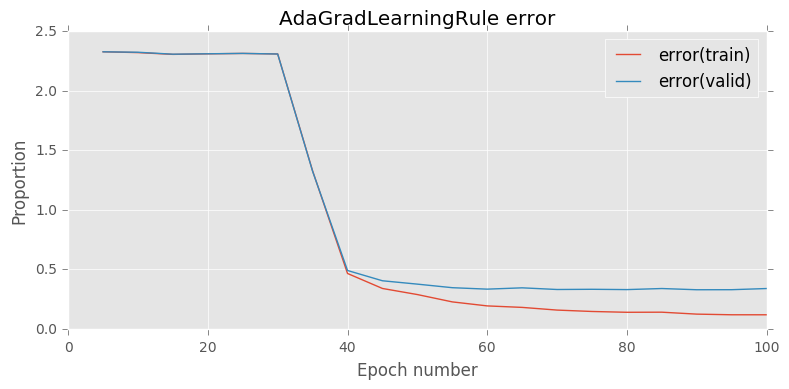

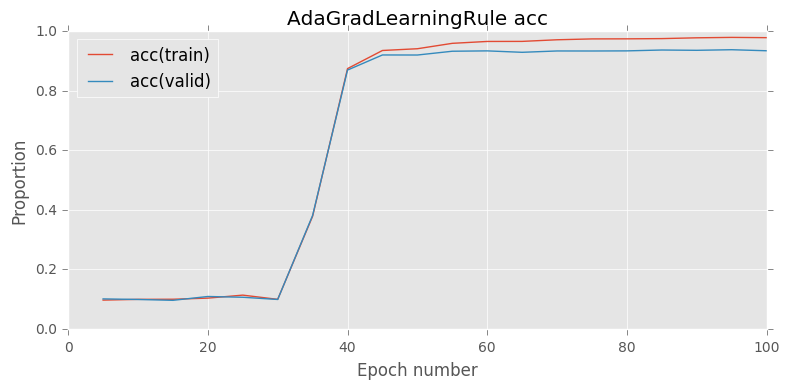

    final error(train) = 1.19e-01
    final error(valid) = 3.39e-01
    final acc(train)   = 9.78e-01
    final acc(valid)   = 9.34e-01
    run time per epoch = 1.66s
--------------------------------------------------------------------------------
learning_rate=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.93s to complete
  error(train)=2.33e+00, acc(train)=9.68e-02, error(valid)=2.33e+00, acc(valid)=1.01e-01, params_penalty=0.00e+00
Epoch 10: 1.13s to complete
  error(train)=2.32e+00, acc(train)=9.94e-02, error(valid)=2.32e+00, acc(valid)=9.90e-02, params_penalty=0.00e+00
Epoch 15: 1.11s to complete
  error(train)=2.31e+00, acc(train)=9.98e-02, error(valid)=2.31e+00, acc(valid)=9.61e-02, params_penalty=0.00e+00
Epoch 20: 1.13s to complete
  error(train)=2.31e+00, acc(train)=1.04e-01, error(valid)=2.31e+00, acc(valid)=1.09e-01, params_penalty=0.00e+00
Epoch 25: 1.12s to complete
  error(train)=2.31e+00, acc(train)=1.14e-01, error(valid)=2.31e+00, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 30: 1.11s to complete
  error(train)=2.31e+00, acc(train)=9.94e-02, error(valid)=2.31e+00, acc(valid)=9.90e-02, params_penalty=0.00e+00
Epoch 35: 1.13s to complete
  error(train)=1.33e+00, acc(train)=3.78e-01, error(valid)=1.32e+00, acc(valid)=3.81e-01, params_penalty=0.00e+00
Epoch 4

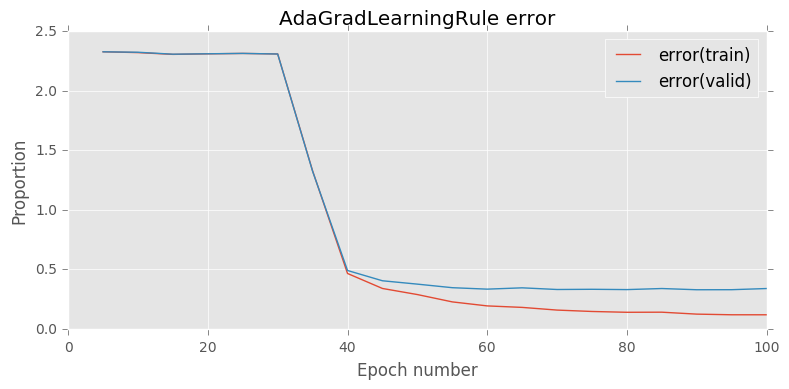

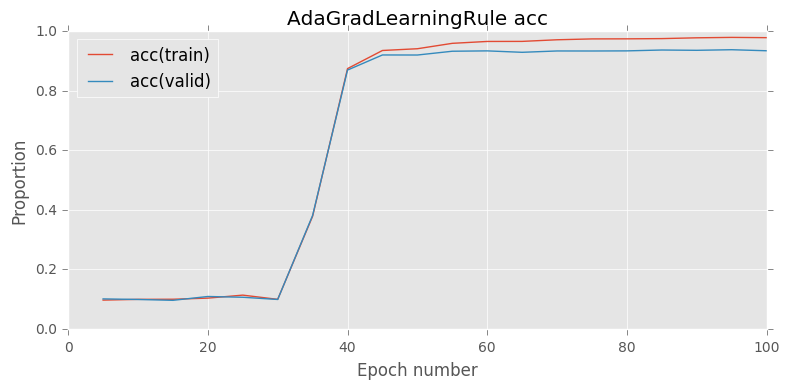

    final error(train) = 1.19e-01
    final error(valid) = 3.39e-01
    final acc(train)   = 9.78e-01
    final acc(valid)   = 9.34e-01
    run time per epoch = 1.28s
--------------------------------------------------------------------------------
learning_rate=0.50 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.13s to complete
  error(train)=2.33e+00, acc(train)=9.68e-02, error(valid)=2.33e+00, acc(valid)=1.01e-01, params_penalty=0.00e+00
Epoch 10: 1.18s to complete
  error(train)=2.32e+00, acc(train)=9.94e-02, error(valid)=2.32e+00, acc(valid)=9.90e-02, params_penalty=0.00e+00
Epoch 15: 1.13s to complete
  error(train)=2.31e+00, acc(train)=9.98e-02, error(valid)=2.31e+00, acc(valid)=9.61e-02, params_penalty=0.00e+00
Epoch 20: 1.13s to complete
  error(train)=2.31e+00, acc(train)=1.04e-01, error(valid)=2.31e+00, acc(valid)=1.09e-01, params_penalty=0.00e+00
Epoch 25: 1.13s to complete
  error(train)=2.31e+00, acc(train)=1.14e-01, error(valid)=2.31e+00, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 30: 1.13s to complete
  error(train)=2.31e+00, acc(train)=9.94e-02, error(valid)=2.31e+00, acc(valid)=9.90e-02, params_penalty=0.00e+00
Epoch 35: 1.14s to complete
  error(train)=1.33e+00, acc(train)=3.78e-01, error(valid)=1.32e+00, acc(valid)=3.81e-01, params_penalty=0.00e+00
Epoch 4

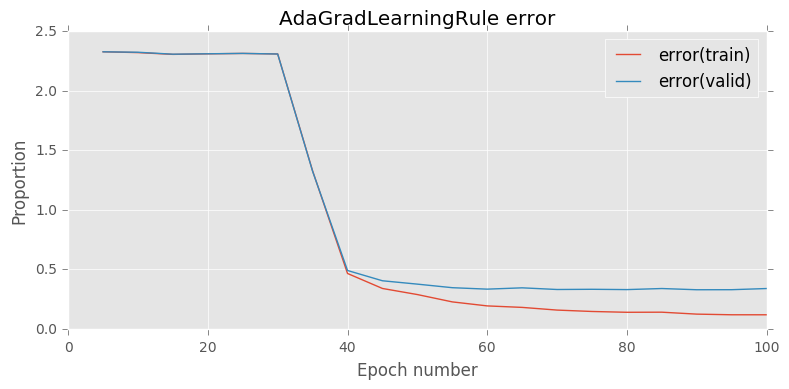

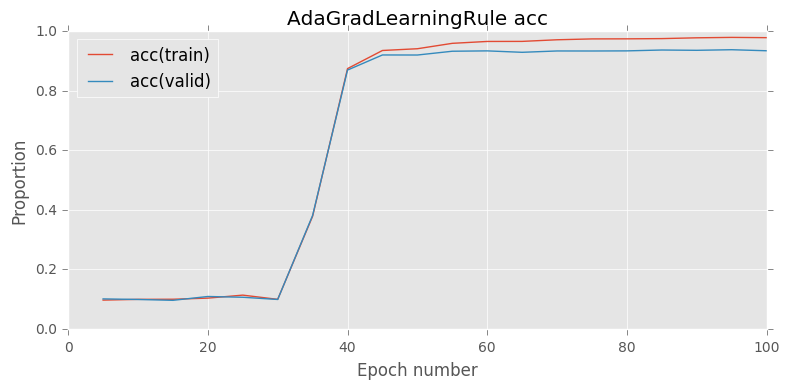

    final error(train) = 1.19e-01
    final error(valid) = 3.39e-01
    final acc(train)   = 9.78e-01
    final acc(valid)   = 9.34e-01
    run time per epoch = 1.25s
| learning_rate | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------|--------------------|--------------------|------------------|------------------|
| 0.0        | 1.19e-01           | 3.39e-01           |  0.98            | 0.93             |
| 0.1        | 1.19e-01           | 3.39e-01           |  0.98            | 0.93             |
| 0.5        | 1.19e-01           | 3.39e-01           |  0.98            | 0.93             |


In [28]:
# ---------------mom_coeff change--------------

num_epochs=100
stats_interval = 5
learning_rates = [0.01,0.1,0.5]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    print('-' * 80)
    print('learning_rate={0:.2f} num_epochs = {1:.2f}'
          .format(learning_rate, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = AdaGradLearningRule(learning_rate=learning_rate, e = 1e-8)
    schedulers=[ConstantLearningRateScheduler(learning_rate=learning_rate)]
    param='ADlearning_rate'+str(learning_rate)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'AdaGradLearningRule',param)
    
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| learning_rate | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|---------------|--------------------|--------------------|------------------|------------------|')
for learning_rate in learning_rates:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(learning_rate, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1

--------------------------------------------------------------------------------
learning_rate=0.01 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.24s to complete
  error(train)=5.71e+01, acc(train)=1.14e-01, error(valid)=5.77e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 10: 1.25s to complete
  error(train)=4.19e+01, acc(train)=9.01e-02, error(valid)=4.20e+01, acc(valid)=9.15e-02, params_penalty=0.00e+00
Epoch 15: 1.23s to complete
  error(train)=2.59e+01, acc(train)=9.90e-02, error(valid)=2.65e+01, acc(valid)=9.67e-02, params_penalty=0.00e+00
Epoch 20: 1.24s to complete
  error(train)=4.65e+01, acc(train)=1.14e-01, error(valid)=4.71e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 25: 1.25s to complete
  error(train)=5.34e+01, acc(train)=9.01e-02, error(valid)=5.34e+01, acc(valid)=9.15e-02, params_penalty=0.00e+00
Epoch 30: 1.24s to complete
  error(train)=4.67e+01, acc(train)=1.14e-01, error(valid)=4.74e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 35: 3.55s to complete
  error(train)=3.73e+01, acc(train)=9.90e-02, error(valid)=3.74e+01, acc(valid)=9.67e-02, params_penalty=0.00e+00
Epoch 4

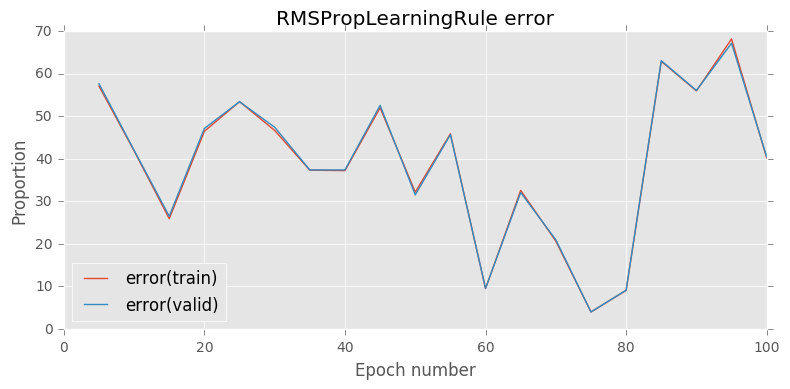

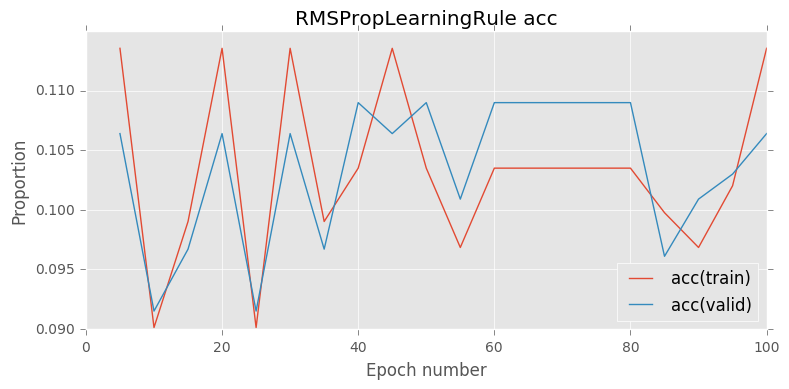

    final error(train) = 4.02e+01
    final error(valid) = 4.05e+01
    final acc(train)   = 1.14e-01
    final acc(valid)   = 1.06e-01
    run time per epoch = 1.55s
--------------------------------------------------------------------------------
learning_rate=0.10 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 3.34s to complete
  error(train)=5.71e+01, acc(train)=1.14e-01, error(valid)=5.77e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 10: 1.36s to complete
  error(train)=4.19e+01, acc(train)=9.01e-02, error(valid)=4.20e+01, acc(valid)=9.15e-02, params_penalty=0.00e+00
Epoch 15: 1.52s to complete
  error(train)=2.59e+01, acc(train)=9.90e-02, error(valid)=2.65e+01, acc(valid)=9.67e-02, params_penalty=0.00e+00
Epoch 20: 1.32s to complete
  error(train)=4.65e+01, acc(train)=1.14e-01, error(valid)=4.71e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 25: 1.32s to complete
  error(train)=5.34e+01, acc(train)=9.01e-02, error(valid)=5.34e+01, acc(valid)=9.15e-02, params_penalty=0.00e+00
Epoch 30: 1.32s to complete
  error(train)=4.67e+01, acc(train)=1.14e-01, error(valid)=4.74e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 35: 1.32s to complete
  error(train)=3.73e+01, acc(train)=9.90e-02, error(valid)=3.74e+01, acc(valid)=9.67e-02, params_penalty=0.00e+00
Epoch 4

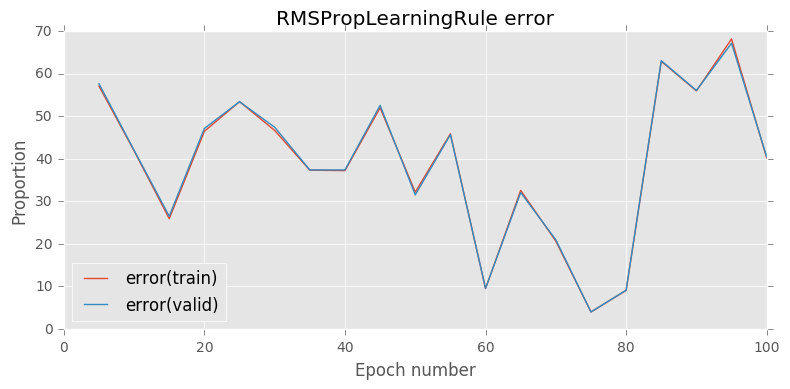

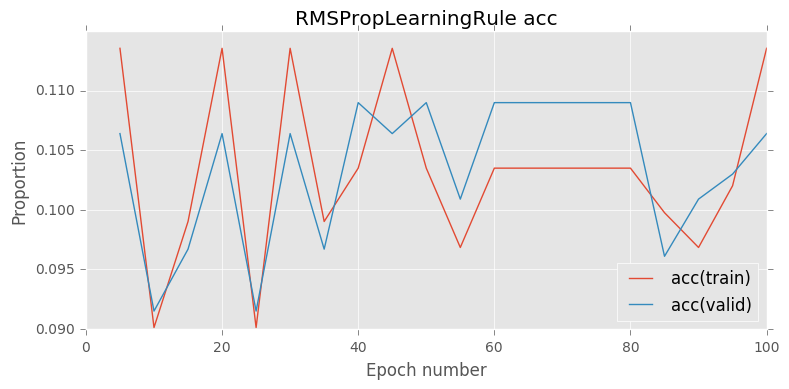

    final error(train) = 4.02e+01
    final error(valid) = 4.05e+01
    final acc(train)   = 1.14e-01
    final acc(valid)   = 1.06e-01
    run time per epoch = 1.50s
--------------------------------------------------------------------------------
learning_rate=0.50 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.28s to complete
  error(train)=5.71e+01, acc(train)=1.14e-01, error(valid)=5.77e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 10: 1.28s to complete
  error(train)=4.19e+01, acc(train)=9.01e-02, error(valid)=4.20e+01, acc(valid)=9.15e-02, params_penalty=0.00e+00
Epoch 15: 1.28s to complete
  error(train)=2.59e+01, acc(train)=9.90e-02, error(valid)=2.65e+01, acc(valid)=9.67e-02, params_penalty=0.00e+00
Epoch 20: 1.28s to complete
  error(train)=4.65e+01, acc(train)=1.14e-01, error(valid)=4.71e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 25: 1.28s to complete
  error(train)=5.34e+01, acc(train)=9.01e-02, error(valid)=5.34e+01, acc(valid)=9.15e-02, params_penalty=0.00e+00
Epoch 30: 1.28s to complete
  error(train)=4.67e+01, acc(train)=1.14e-01, error(valid)=4.74e+01, acc(valid)=1.06e-01, params_penalty=0.00e+00
Epoch 35: 1.28s to complete
  error(train)=3.73e+01, acc(train)=9.90e-02, error(valid)=3.74e+01, acc(valid)=9.67e-02, params_penalty=0.00e+00
Epoch 4

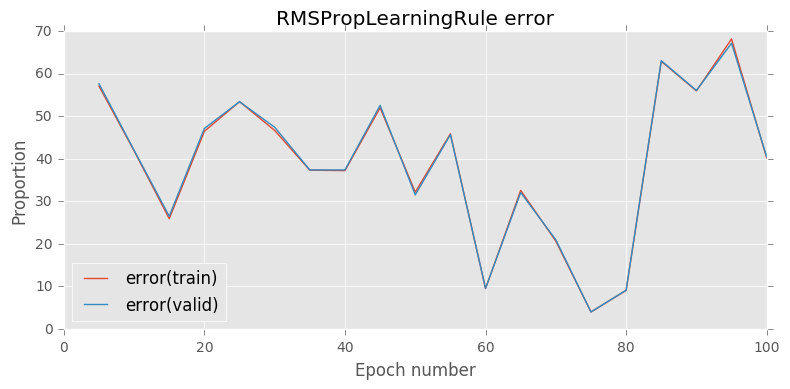

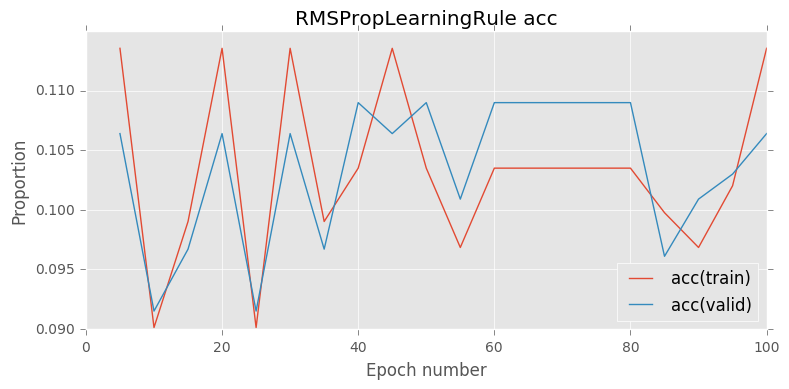

    final error(train) = 4.02e+01
    final error(valid) = 4.05e+01
    final acc(train)   = 1.14e-01
    final acc(valid)   = 1.06e-01
    run time per epoch = 1.44s
| learning_rate | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------|--------------------|--------------------|------------------|------------------|
| 0.0        | 4.02e+01           | 4.05e+01           |  0.11            | 0.11             |
| 0.1        | 4.02e+01           | 4.05e+01           |  0.11            | 0.11             |
| 0.5        | 4.02e+01           | 4.05e+01           |  0.11            | 0.11             |


In [29]:
# ---------------mom_coeff change--------------

num_epochs=100
stats_interval = 5
learning_rates = [0.01,0.1,0.5]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for learning_rate in learning_rates:
    print('-' * 80)
    print('learning_rate={0:.2f} num_epochs = {1:.2f}'
          .format(learning_rate, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = RMSPropLearningRule(learning_rate=learning_rate, e = 1e-8, beta=0.9)
    schedulers=[ConstantLearningRateScheduler(learning_rate=learning_rate)]
    param='RMSlearning_rate'+str(learning_rate)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'RMSPropLearningRule',param)
    
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| learning_rate | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|---------------|--------------------|--------------------|------------------|------------------|')
for learning_rate in learning_rates:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(learning_rate, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1

--------------------------------------------------------------------------------
beta=0.90 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.29s to complete
  error(train)=1.83e+00, acc(train)=8.86e-01, error(valid)=1.65e+00, acc(valid)=9.00e-01, params_penalty=0.00e+00
Epoch 10: 1.32s to complete
  error(train)=1.51e+00, acc(train)=9.09e-01, error(valid)=1.40e+00, acc(valid)=9.16e-01, params_penalty=0.00e+00
Epoch 15: 1.34s to complete
  error(train)=1.68e+00, acc(train)=9.20e-01, error(valid)=1.74e+00, acc(valid)=9.19e-01, params_penalty=0.00e+00
Epoch 20: 1.35s to complete
  error(train)=1.61e+00, acc(train)=9.22e-01, error(valid)=1.70e+00, acc(valid)=9.22e-01, params_penalty=0.00e+00
Epoch 25: 1.33s to complete
  error(train)=1.46e+00, acc(train)=9.26e-01, error(valid)=1.46e+00, acc(valid)=9.27e-01, params_penalty=0.00e+00
Epoch 30: 1.39s to complete
  error(train)=1.37e+00, acc(train)=9.36e-01, error(valid)=1.53e+00, acc(valid)=9.39e-01, params_penalty=0.00e+00
Epoch 35: 1.35s to complete
  error(train)=1.58e+00, acc(train)=9.32e-01, error(valid)=1.78e+00, acc(valid)=9.30e-01, params_penalty=0.00e+00
Epoch 4

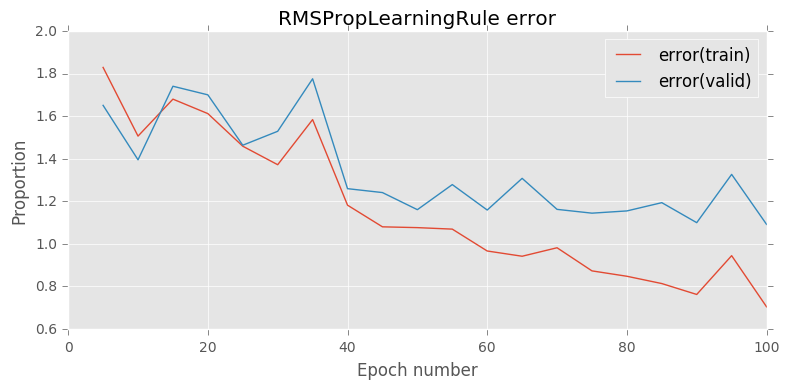

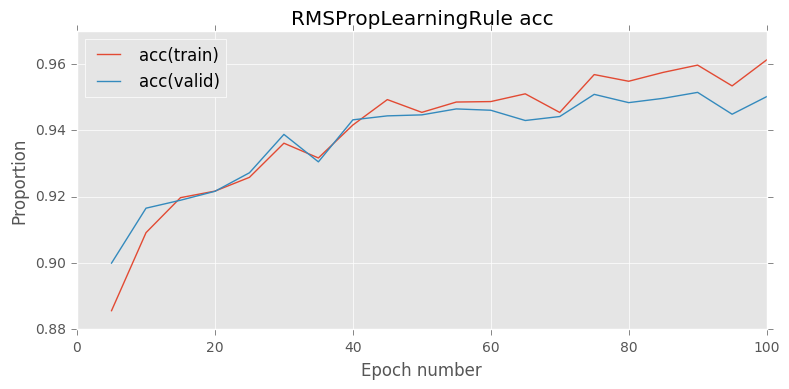

    final error(train) = 7.04e-01
    final error(valid) = 1.09e+00
    final acc(train)   = 9.61e-01
    final acc(valid)   = 9.50e-01
    run time per epoch = 1.50s
--------------------------------------------------------------------------------
beta=0.09 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.28s to complete
  error(train)=1.83e+00, acc(train)=8.86e-01, error(valid)=1.65e+00, acc(valid)=9.00e-01, params_penalty=0.00e+00
Epoch 10: 1.30s to complete
  error(train)=1.51e+00, acc(train)=9.09e-01, error(valid)=1.40e+00, acc(valid)=9.16e-01, params_penalty=0.00e+00
Epoch 15: 1.33s to complete
  error(train)=1.68e+00, acc(train)=9.20e-01, error(valid)=1.74e+00, acc(valid)=9.19e-01, params_penalty=0.00e+00
Epoch 20: 1.34s to complete
  error(train)=1.61e+00, acc(train)=9.22e-01, error(valid)=1.70e+00, acc(valid)=9.22e-01, params_penalty=0.00e+00
Epoch 25: 1.33s to complete
  error(train)=1.46e+00, acc(train)=9.26e-01, error(valid)=1.46e+00, acc(valid)=9.27e-01, params_penalty=0.00e+00
Epoch 30: 1.35s to complete
  error(train)=1.37e+00, acc(train)=9.36e-01, error(valid)=1.53e+00, acc(valid)=9.39e-01, params_penalty=0.00e+00
Epoch 35: 1.37s to complete
  error(train)=1.58e+00, acc(train)=9.32e-01, error(valid)=1.78e+00, acc(valid)=9.30e-01, params_penalty=0.00e+00
Epoch 4

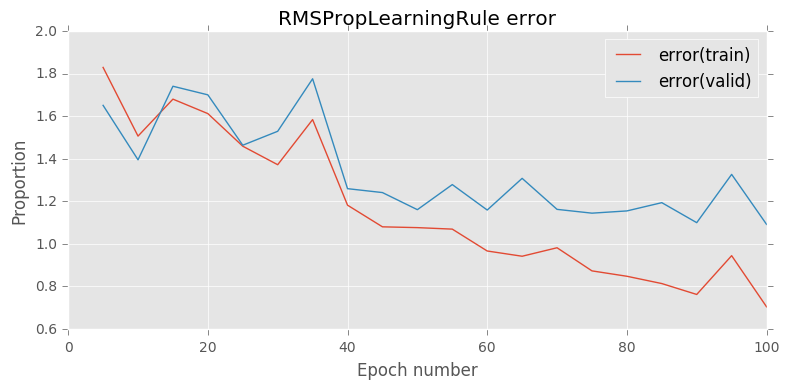

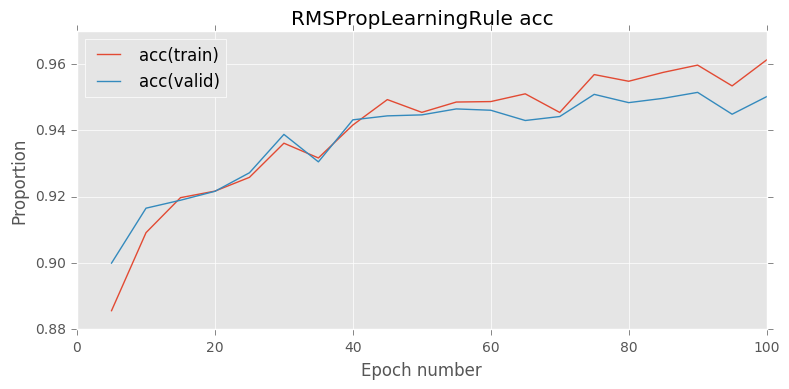

    final error(train) = 7.04e-01
    final error(valid) = 1.09e+00
    final acc(train)   = 9.61e-01
    final acc(valid)   = 9.50e-01
    run time per epoch = 1.53s
--------------------------------------------------------------------------------
beta=0.01 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 1.35s to complete
  error(train)=1.83e+00, acc(train)=8.86e-01, error(valid)=1.65e+00, acc(valid)=9.00e-01, params_penalty=0.00e+00
Epoch 10: 1.36s to complete
  error(train)=1.51e+00, acc(train)=9.09e-01, error(valid)=1.40e+00, acc(valid)=9.16e-01, params_penalty=0.00e+00
Epoch 15: 1.33s to complete
  error(train)=1.68e+00, acc(train)=9.20e-01, error(valid)=1.74e+00, acc(valid)=9.19e-01, params_penalty=0.00e+00
Epoch 20: 1.34s to complete
  error(train)=1.61e+00, acc(train)=9.22e-01, error(valid)=1.70e+00, acc(valid)=9.22e-01, params_penalty=0.00e+00
Epoch 25: 1.34s to complete
  error(train)=1.46e+00, acc(train)=9.26e-01, error(valid)=1.46e+00, acc(valid)=9.27e-01, params_penalty=0.00e+00
Epoch 30: 1.35s to complete
  error(train)=1.37e+00, acc(train)=9.36e-01, error(valid)=1.53e+00, acc(valid)=9.39e-01, params_penalty=0.00e+00
Epoch 35: 1.36s to complete
  error(train)=1.58e+00, acc(train)=9.32e-01, error(valid)=1.78e+00, acc(valid)=9.30e-01, params_penalty=0.00e+00
Epoch 4

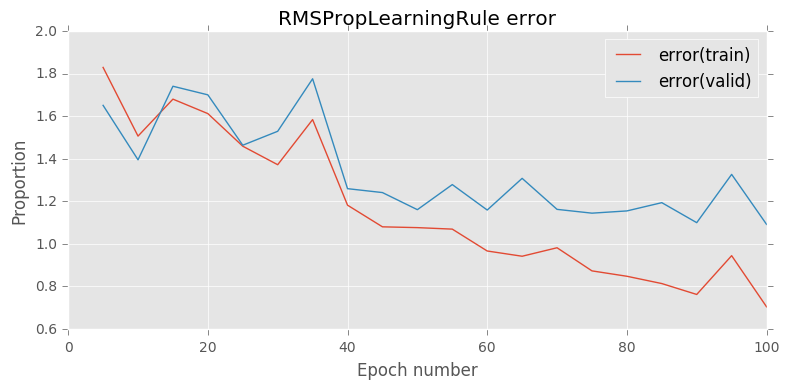

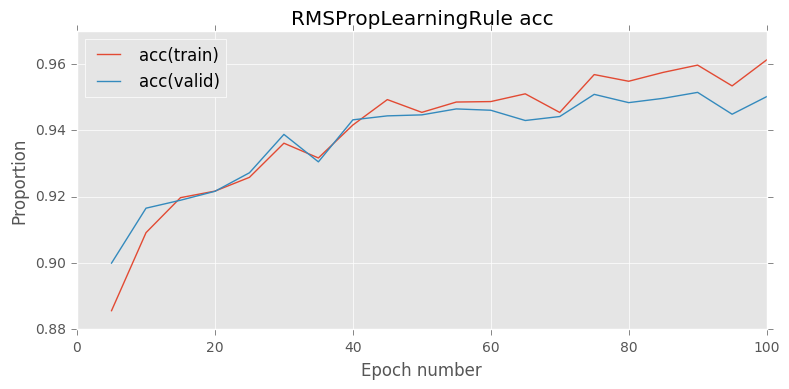

    final error(train) = 7.04e-01
    final error(valid) = 1.09e+00
    final acc(train)   = 9.61e-01
    final acc(valid)   = 9.50e-01
    run time per epoch = 1.53s
|     beta      | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|---------------|--------------------|--------------------|------------------|------------------|
| 0.9        | 7.04e-01           | 1.09e+00           |  0.96            | 0.95             |
| 0.1        | 7.04e-01           | 1.09e+00           |  0.96            | 0.95             |
| 0.0        | 7.04e-01           | 1.09e+00           |  0.96            | 0.95             |


In [25]:
# ---------------mom_coeff change--------------

num_epochs=100
stats_interval = 5
betas = [0.9,0.09,0.009]
learning_rate=0.05

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for beta in betas:
    print('-' * 80)
    print('beta={0:.2f} num_epochs = {1:.2f}'
          .format(beta, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = RMSPropLearningRule(learning_rate=learning_rate, e = 1e-8, beta=beta)
    schedulers=[ConstantLearningRateScheduler(learning_rate=learning_rate)]
    param='RMSbeta'+str(beta)
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'RMSPropLearningRule',param)
    
    plt.show()
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('|     beta      | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|---------------|--------------------|--------------------|------------------|------------------|')
for beta in betas:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(beta, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1

--------------------------------------------------------------------------------
learning_rate=0.50 mom_coeff=0.90 num_epochs = 100.00
--------------------------------------------------------------------------------


Epoch 5: 0.87s to complete
  error(train)=4.67e-02, acc(train)=9.86e-01, error(valid)=9.92e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 10: 0.86s to complete
  error(train)=2.65e-02, acc(train)=9.91e-01, error(valid)=1.05e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 15: 0.86s to complete
  error(train)=1.67e-02, acc(train)=9.94e-01, error(valid)=1.09e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00
Epoch 20: 0.85s to complete
  error(train)=9.27e-03, acc(train)=9.97e-01, error(valid)=1.19e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 25: 0.86s to complete
  error(train)=9.04e-03, acc(train)=9.97e-01, error(valid)=1.36e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00
Epoch 30: 3.12s to complete
  error(train)=6.80e-03, acc(train)=9.98e-01, error(valid)=1.20e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00
Epoch 35: 0.89s to complete
  error(train)=4.26e-04, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00
Epoch 4

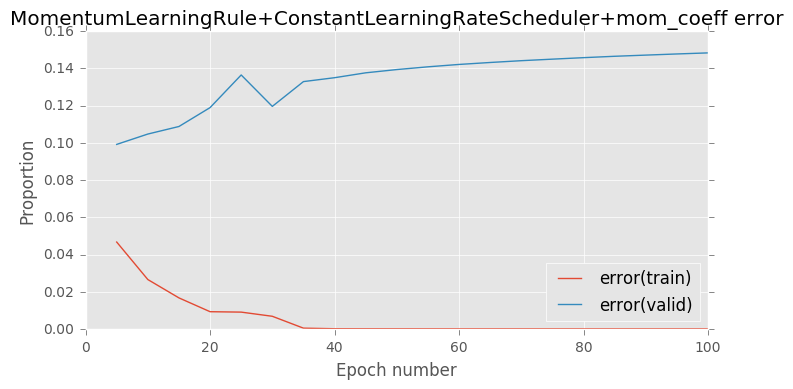

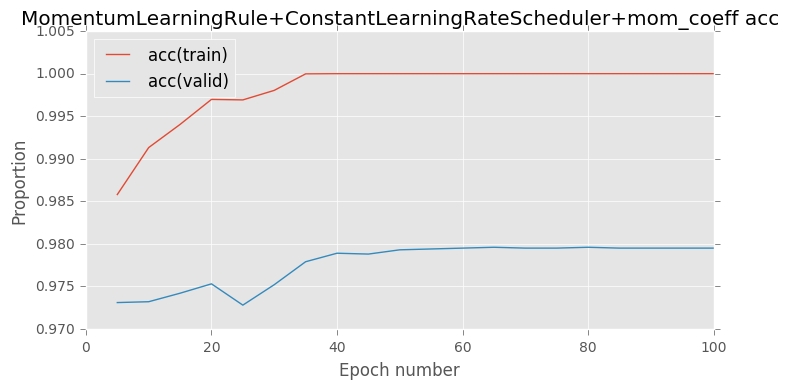

    final error(train) = 2.59e-05
    final error(valid) = 1.48e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.18s
| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |
|-----------|--------------------|--------------------|------------------|------------------|
| 0.9        | 2.59e-05           | 1.48e-01           |  1.00            | 0.98             |


In [27]:
# mom_coeffs--------------double rate loop

num_epochs=100
stats_interval = 5
learning_rate = 0.5
mom_coeffs = [0.9]

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

for mom_coeff in mom_coeffs:
    print('-' * 80)
    print('learning_rate={0:.2f} mom_coeff={1:.2f} num_epochs = {2:.2f}'
          .format(learning_rate, mom_coeff, num_epochs))
    print('-' * 80)
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()


    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = MomentumLearningRule(learning_rate=learning_rate,mom_coeff=mom_coeff)
    schedule = [ConstantLearningRateScheduler(learning_rate=learning_rate)]
    param='par3 compare'
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedule,'MomentumLearningRule+ConstantLearningRateScheduler+mom_coeff',param)
    
    plt.show()

    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
j = 0
print('| mom_coffe | final error(train) | final error(valid) | final acc(train) | final acc(valid) |')
print('|-----------|--------------------|--------------------|------------------|------------------|')
for mom_coeff in mom_coeffs:
    print('| {0:.1f}        | {1:.2e}           | {2:.2e}           |  {3:.2f}            | {4:.2f}             |'
            .format(mom_coeff, 
                    final_errors_train[j], final_errors_valid[j],
                    final_accs_train[j], final_accs_valid[j]))
    j += 1
    